In [1]:
import pandas as pd

# Example: all your results in a list of dicts
data = [
    # Vietnam 1989
    # Vietnam 1989
    {"Country": "Vietnam", "Year": 1989, "Sample": 1, "True_Risk": 4483, "SUDA_Score": 14236},
    {"Country": "Vietnam", "Year": 1989, "Sample": 2, "True_Risk": 4483, "SUDA_Score": 14268},

    # Vietnam 2019
    {"Country": "Vietnam", "Year": 2019, "Sample": 1, "True_Risk": 62254, "SUDA_Score": 203780},
    {"Country": "Vietnam", "Year": 2019, "Sample": 2, "True_Risk": 62254, "SUDA_Score": 204992},

    # Dominican Republic 1981
    {"Country": "Dominican Republic", "Year": 1981, "Sample": 1, "True_Risk": 1633, "SUDA_Score": 4440},
    {"Country": "Dominican Republic", "Year": 1981, "Sample": 2, "True_Risk": 1633, "SUDA_Score": 4396},

    # Dominican Republic 2010
    {"Country": "Dominican Republic", "Year": 2010, "Sample": 1, "True_Risk": 201, "SUDA_Score": 552},
    {"Country": "Dominican Republic", "Year": 2010, "Sample": 2, "True_Risk": 201, "SUDA_Score": 536},

    # Hungary 1980
    {"Country": "Hungary", "Year": 1980, "Sample": 1, "True_Risk": 49, "SUDA_Score": 168},
    {"Country": "Hungary", "Year": 1980, "Sample": 2, "True_Risk": 49, "SUDA_Score": 168},

    # Hungary 2011
    {"Country": "Hungary", "Year": 2011, "Sample": 1, "True_Risk": 69, "SUDA_Score": 352},
    {"Country": "Hungary", "Year": 2011, "Sample": 2, "True_Risk": 69, "SUDA_Score": 352},

    # Switzerland 1980
    {"Country": "Switzerland", "Year": 1980, "Sample": 1, "True_Risk": 99, "SUDA_Score": 336},
    {"Country": "Switzerland", "Year": 1980, "Sample": 2, "True_Risk": 99, "SUDA_Score": 336},

    # Switzerland 2011
    {"Country": "Switzerland", "Year": 2011, "Sample": 1, "True_Risk": 15061, "SUDA_Score": 29872},
    {"Country": "Switzerland", "Year": 2011, "Sample": 2, "True_Risk": 15061, "SUDA_Score": 29864},
]

# Create DataFrame
df = pd.DataFrame(data)

# Calculate error % for each row
df["Error_%"] = ((df["SUDA_Score"] - df["True_Risk"]) / df["True_Risk"]) * 100

# Save for later use
df.to_csv("nrisk_comparison.csv", index=False)

print(df)

               Country  Year  Sample  True_Risk  SUDA_Score     Error_%
0              Vietnam  1989       1       4483       14236  217.555209
1              Vietnam  1989       2       4483       14268  218.269016
2              Vietnam  2019       1      62254      203780  227.336396
3              Vietnam  2019       2      62254      204992  229.283259
4   Dominican Republic  1981       1       1633        4440  171.892223
5   Dominican Republic  1981       2       1633        4396  169.197795
6   Dominican Republic  2010       1        201         552  174.626866
7   Dominican Republic  2010       2        201         536  166.666667
8              Hungary  1980       1         49         168  242.857143
9              Hungary  1980       2         49         168  242.857143
10             Hungary  2011       1         69         352  410.144928
11             Hungary  2011       2         69         352  410.144928
12         Switzerland  1980       1         99         336  239

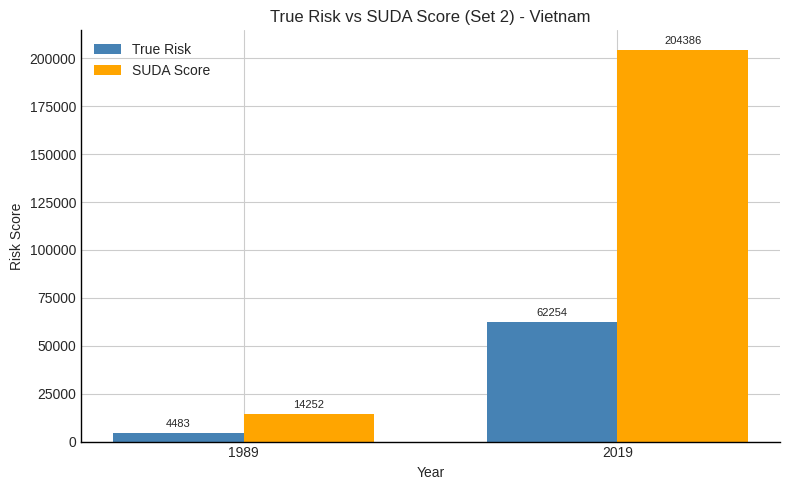

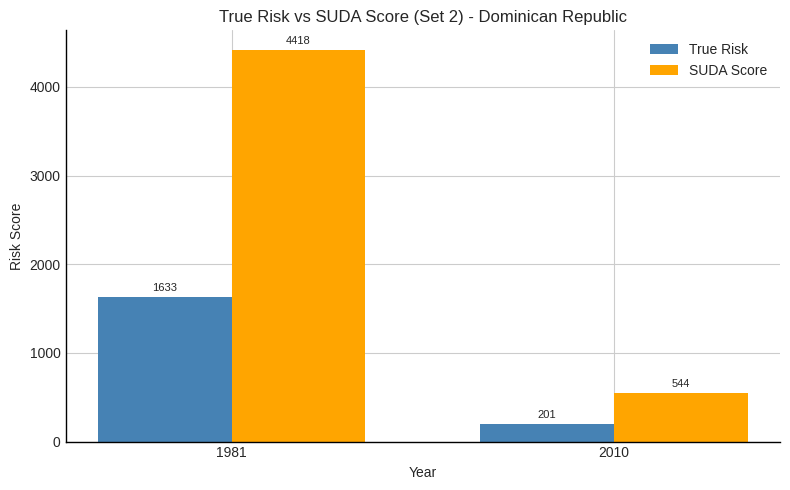

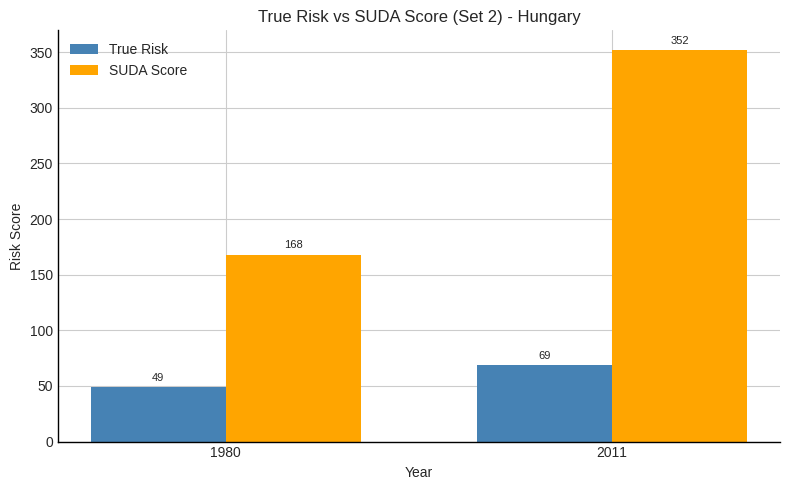

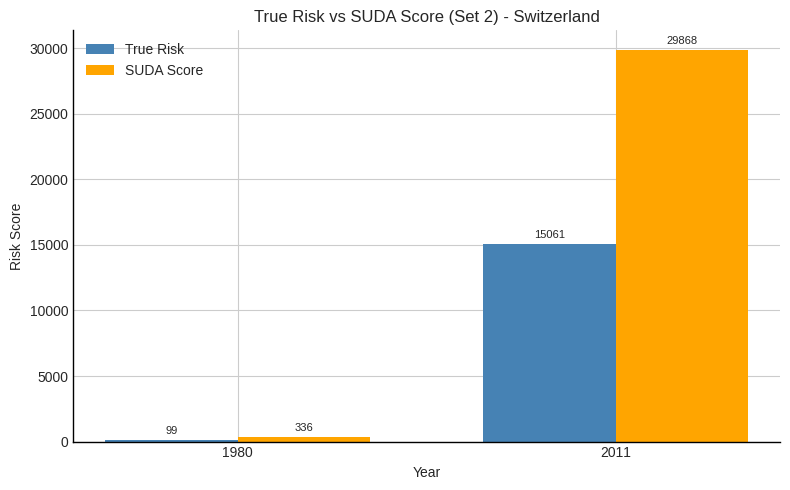

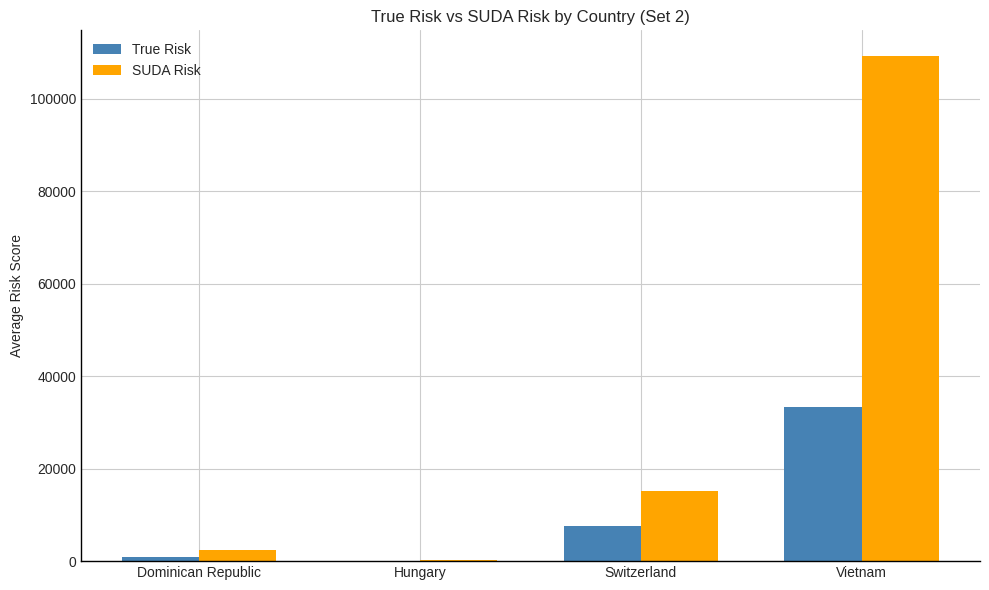

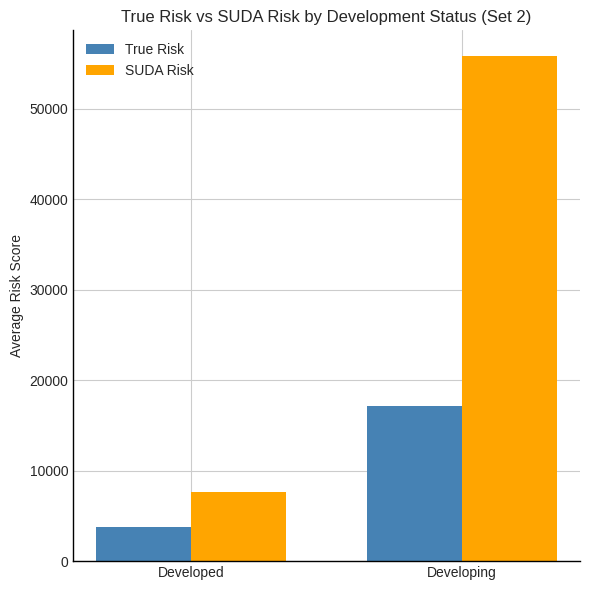

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Global Plotting Style
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "black",
    "axes.linewidth": 1,
    "font.size": 10
})

# Load Data
df = pd.read_csv("nrisk_comparison.csv")

# Plot Time Series (Grouped Bar by Country)
countries = df["Country"].unique()

for country in countries:
    subset = df[df["Country"] == country]

    years = sorted(subset["Year"].unique())
    true_scores = [subset[subset["Year"] == y]["True_Risk"].mean() for y in years]
    suda_scores = [subset[subset["Year"] == y]["SUDA_Score"].mean() for y in years]

    x = np.arange(len(years))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8, 5))
    bars1 = ax.bar(x - width/2, true_scores, width, label='True Risk', color='steelblue')
    bars2 = ax.bar(x + width/2, suda_scores, width, label='SUDA Score', color='orange')

    ax.set_xlabel("Year")
    ax.set_ylabel("Risk Score")
    ax.set_title(f"True Risk vs SUDA Score (Set 2) - {country}")
    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.legend()

    # Add value labels on top of bars
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()

# Country-Level and Development-Level Averages (Raw Values)
country_summary = df.groupby("Country").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()

# Define developed vs developing countries
developed = ["Hungary", "Switzerland"]
df["Development_Status"] = df["Country"].apply(
    lambda x: "Developed" if x in developed else "Developing"
)

dev_summary = df.groupby("Development_Status").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()


# Visualisation 1: Country-Level Bar Chart (Raw Values)
plt.figure(figsize=(10, 6))
x = range(len(country_summary))
width = 0.35

plt.bar([i - width/2 for i in x], country_summary["Avg_True_Risk"], width,
        label="True Risk", color="steelblue")
plt.bar([i + width/2 for i in x], country_summary["Avg_SUDA_Risk"], width,
        label="SUDA Risk", color="orange")

plt.xticks(ticks=x, labels=country_summary["Country"])
plt.ylabel("Average Risk Score")
plt.title("True Risk vs SUDA Risk by Country (Set 2)")
plt.legend()
plt.tight_layout()
plt.show()


# Visualisation 2: Development Status Bar Chart (Raw Values)
plt.figure(figsize=(6, 6))
x = range(len(dev_summary))

plt.bar([i - width/2 for i in x], dev_summary["Avg_True_Risk"], width,
        label="True Risk", color="steelblue")
plt.bar([i + width/2 for i in x], dev_summary["Avg_SUDA_Risk"], width,
        label="SUDA Risk", color="orange")

plt.xticks(ticks=x, labels=dev_summary["Development_Status"])
plt.ylabel("Average Risk Score")
plt.title("True Risk vs SUDA Risk by Development Status (Set 2)")
plt.legend()
plt.tight_layout()
plt.show()


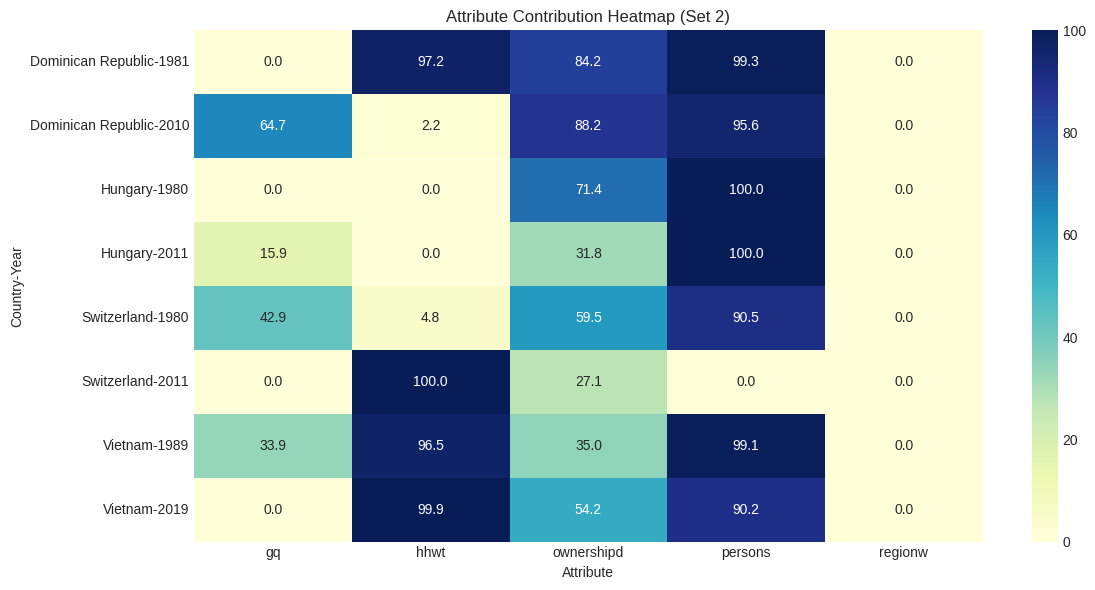

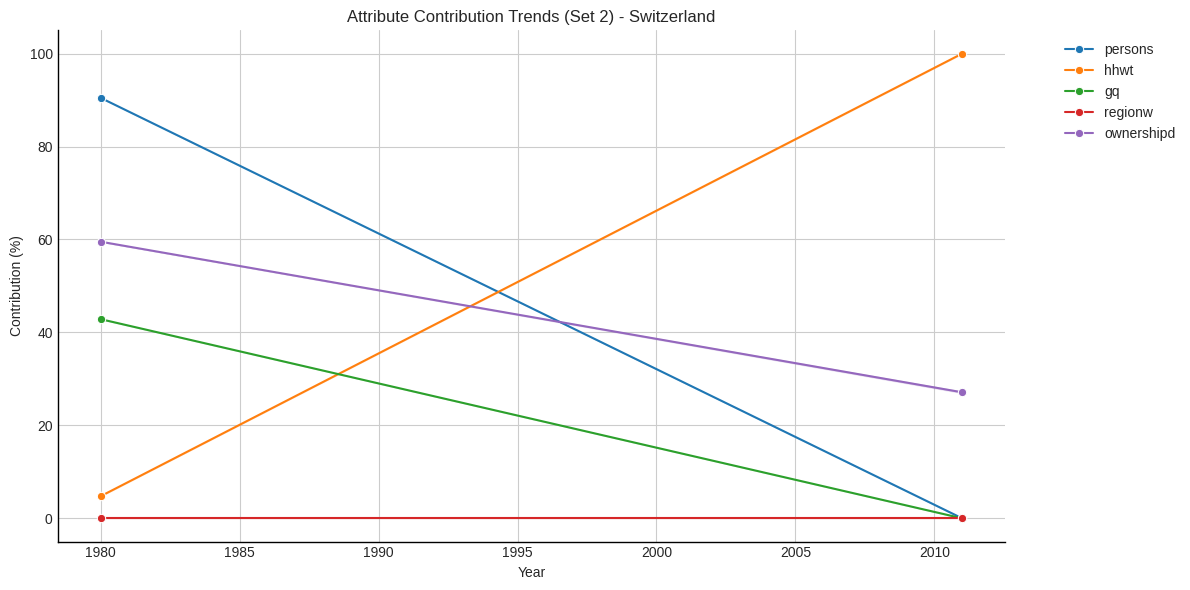

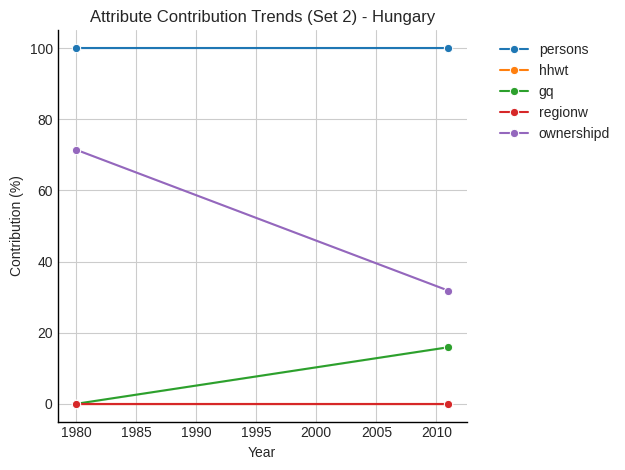

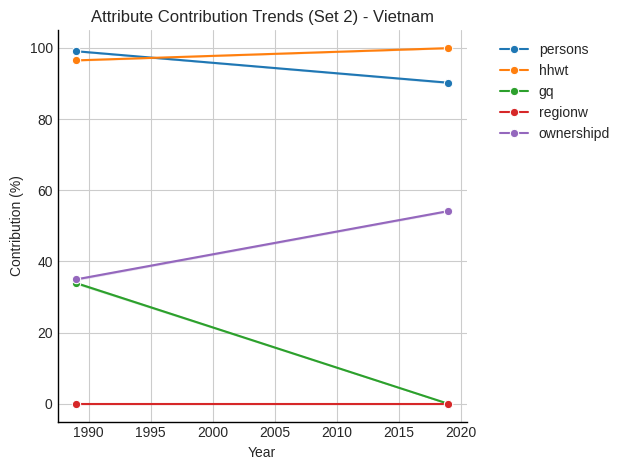

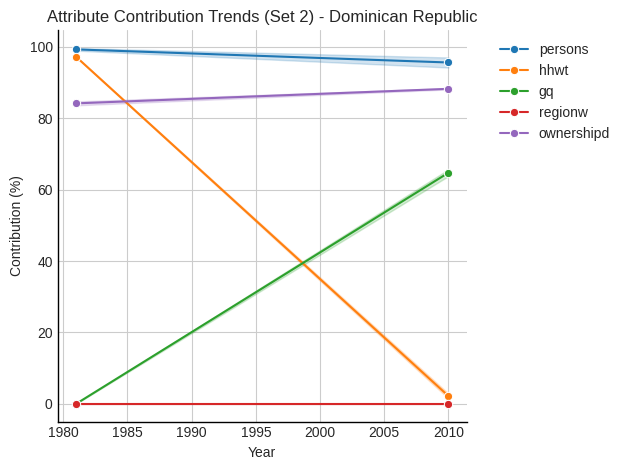

/tmp/ipython-input-2454871754.py:136: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=msu_data, x="Year", y="Count", hue="MSU_Size", ci=None)


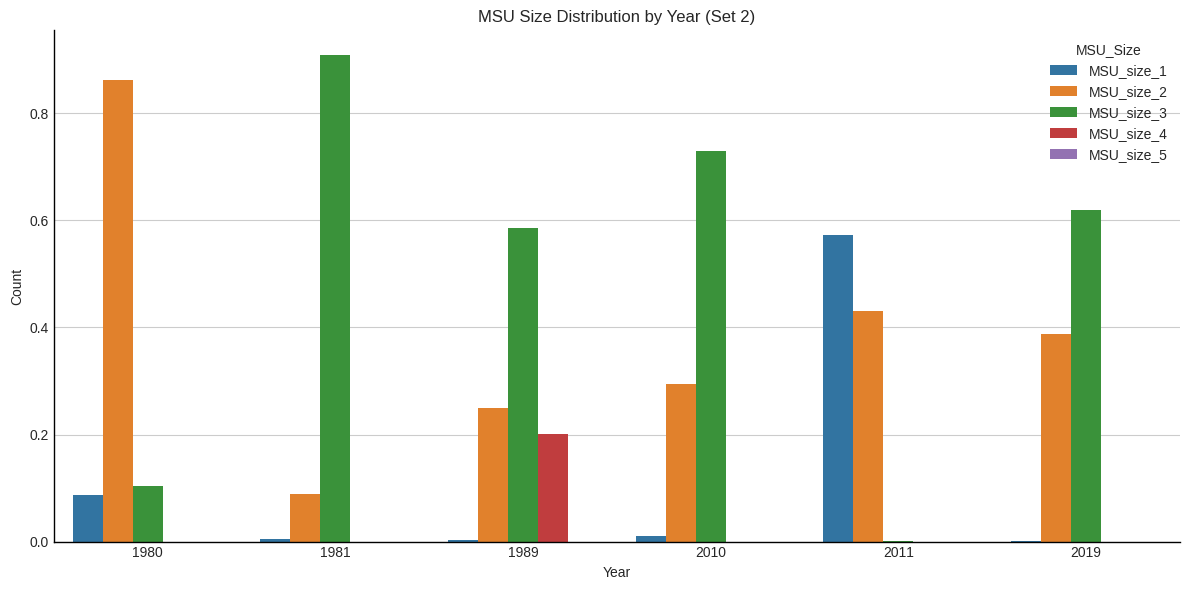

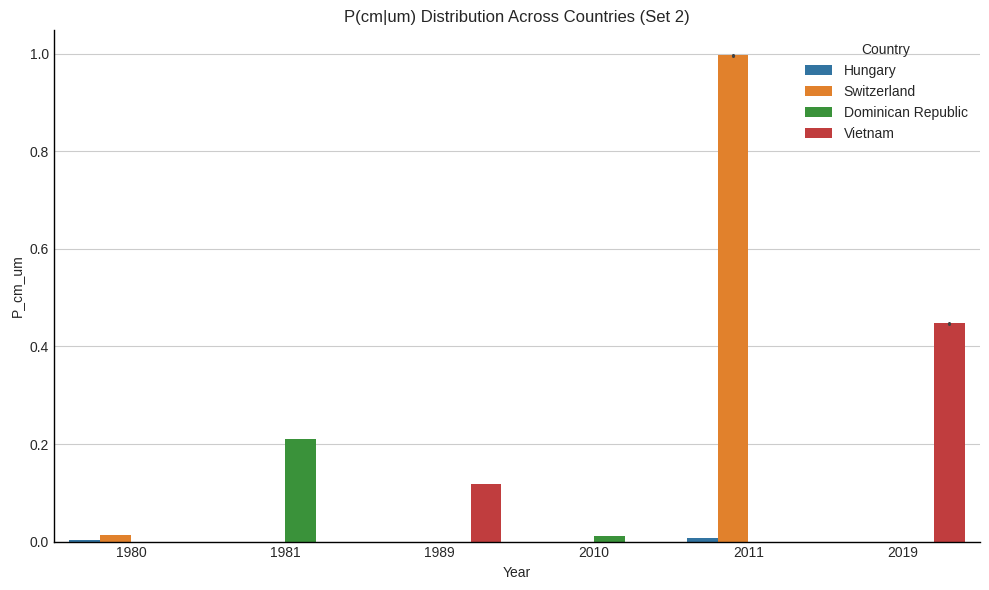

In [6]:
import re
import seaborn as sns
import glob

#Read Attribute Contribution Files
def parse_attr_contrib(file_path):
    """
    Reads an attribute contribution text file and returns a DataFrame with Country, Year, Sample, Attribute, Contribution%.
    """
    # Extract country, year, sample from filename
    match = re.search(r"(s\d)_([a-z]{1,3})(\d{4})_attribute_contrib", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame() # Return empty DataFrame for unmatched files

    country_map = {'nv': 'Vietnam', 'ndr': 'Dominican Republic', 'nh': 'Hungary', 'ns': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code) if country_code else None

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()


    rows = []
    with open(file_path, 'r') as f:
        for line in f:
            match_attr = re.match(r"col#\d+\s+att\s+'(.+)'\s+percentage contribution\s+([\d.]+)", line.strip())
            if match_attr:
                attribute = match_attr.group(1)
                contrib = float(match_attr.group(2))
                rows.append({"Country": country, "Year": year, "Sample": sample,
                             "Attribute": attribute, "Contribution_%": contrib})
    return pd.DataFrame(rows)

attr_files = glob.glob("*_attribute_contrib.txt")
attr_df = pd.concat([parse_attr_contrib(f) for f in attr_files], ignore_index=True)


#Read Records CSV Files
records_files = glob.glob("*_records.csv")
records_dfs = []
for f in records_files:
    match = re.search(r"(s\d)_([a-z]{1,3})(\d{4})_records", f, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {f}")
        continue # Skip this file if filename doesn't match

    country_map = {'nv': 'Vietnam', 'ndr': 'Dominican Republic', 'nh': 'Hungary', 'ns': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code) if country_code else None

    if country is None:
         print(f"Warning: Could not determine country for file: {f}")
         continue


    df_temp = pd.read_csv(f)
    df_temp["Country"] = country
    df_temp["Year"] = year
    df_temp["Sample"] = sample
    records_dfs.append(df_temp)

records_df = pd.concat(records_dfs, ignore_index=True)


#Read Summary TXT Files
def parse_summary(file_path):
    """
    Reads a SUDA summary text file and extracts P(cm|um) and Sample Unique count.
    """
    match = re.search(r"(s\d)_([a-z]{1,3})(\d{4})_summary", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame() # Return empty DataFrame for unmatched files

    country_map = {'nv': 'Vietnam', 'ndr': 'Dominican Republic', 'nh': 'Hungary', 'ns': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code) if country_code else None

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()


    p_cm_um, sample_uniques = None, None
    with open(file_path, 'r') as f:
        for line in f:
            if "P(cm|um)" in line:
                p_cm_um = float(line.split("=")[1].strip())
            if "Sample Unique records" in line:
                sample_uniques = int(line.split()[-1])

    return pd.DataFrame([{"Country": country, "Year": year, "Sample": sample,
                          "P_cm_um": p_cm_um, "Sample_Uniques": sample_uniques}])

summary_files = glob.glob("*_summary.txt")
summary_df = pd.concat([parse_summary(f) for f in summary_files], ignore_index=True)


#Visualizations

# 1. Attribute Contribution Heatmap
heatmap_data = attr_df.pivot_table(index=["Country", "Year"], columns="Attribute", values="Contribution_%", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Attribute Contribution Heatmap (Set 2)")
plt.tight_layout()
plt.show()

# 2. Attribute Contribution Trends Over Time
plt.figure(figsize=(12, 6))
for country in attr_df["Country"].unique():
    subset = attr_df[attr_df["Country"] == country]
    sns.lineplot(data=subset, x="Year", y="Contribution_%", hue="Attribute", marker="o")
    plt.title(f"Attribute Contribution Trends (Set 2) - {country}")
    plt.ylabel("Contribution (%)")
    plt.xlabel("Year")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 3. MSU Size Distribution
msu_cols = [col for col in records_df.columns if col.startswith("MSU_size_")]
msu_data = records_df.melt(id_vars=["Country", "Year", "Sample"], value_vars=msu_cols, var_name="MSU_Size", value_name="Count")
plt.figure(figsize=(12, 6))
sns.barplot(data=msu_data, x="Year", y="Count", hue="MSU_Size", ci=None)
plt.title("MSU Size Distribution by Year (Set 2)")
plt.tight_layout()
plt.show()

# 4. P(cm|um) Distribution Across Countries
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Year", y="P_cm_um", hue="Country")
plt.title("P(cm|um) Distribution Across Countries (Set 2)")
plt.tight_layout()
plt.show()

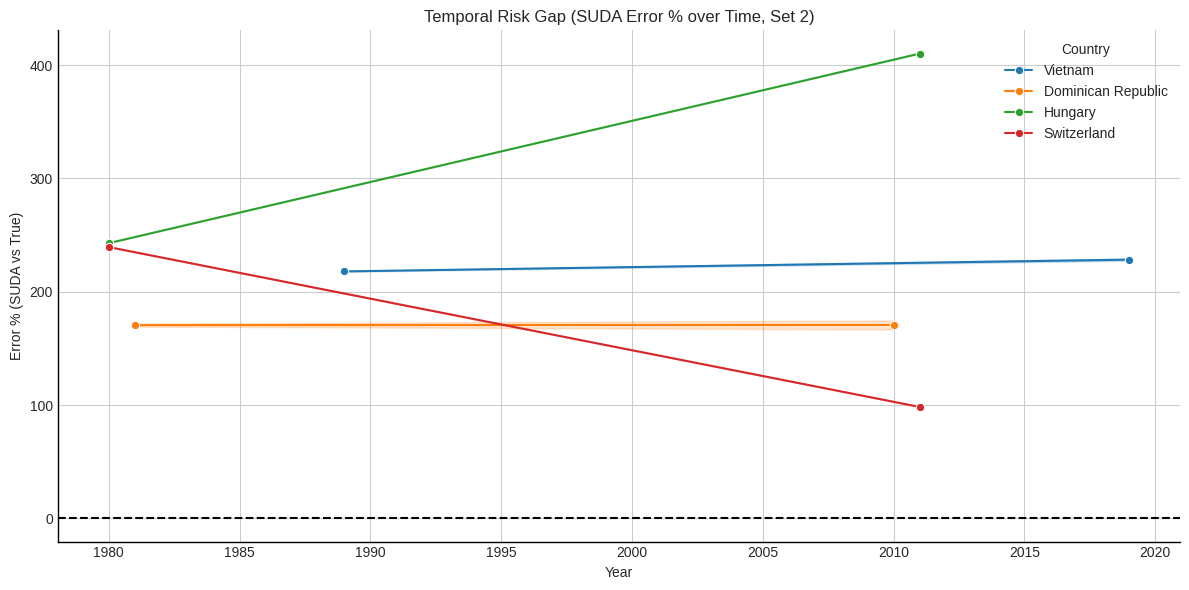

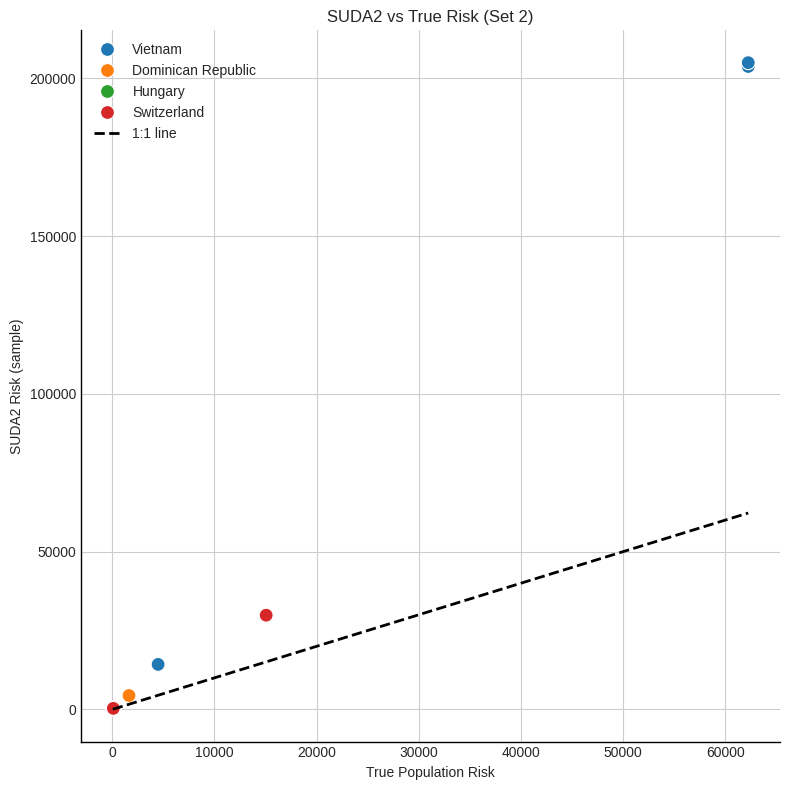

In [9]:
#Averages

#Country-level averages
country_summary = df.groupby("Country").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()

#Developed vs Developing classification
developed = ["Hungary", "Switzerland"]
developing = ["Vietnam", "Dominican Republic"]

df["Development_Status"] = df["Country"].apply(lambda x: "Developed" if x in developed else "Developing")

#Averages by Development Status
dev_summary = df.groupby("Development_Status").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean"),
    Avg_Error_Percent=("Error_%", "mean")
).reset_index()

#Save summaries
country_summary.to_csv("ncountry_risk_summary.csv", index=False)
dev_summary.to_csv("ndev_status_summary.csv", index=False)

#Load True Risk CSV
true_risk_df = pd.read_csv("nrisk_comparison.csv")

# Convert 'Sample' column in summary_df to integer type
summary_df['Sample'] = summary_df['Sample'].str.replace('s', '').astype(int)

# Merge true_risk_df with summary_df to get full context if needed
risk_profile_df = true_risk_df.merge(summary_df, left_on=["Country", "Year", "Sample"], right_on=["Country", "Year", "Sample"], how="left")

# Define hue order for consistency
country_order = risk_profile_df["Country"].unique()

# 5. Temporal Risk Gap (Error % Over Time)
plt.figure(figsize=(12, 6))
sns.lineplot(data=risk_profile_df, x="Year", y="Error_%", hue="Country", marker="o")
plt.axhline(0, color="black", linestyle="--")
plt.title("Temporal Risk Gap (SUDA Error % over Time, Set 2)")
plt.ylabel("Error % (SUDA vs True)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# 6. Scatter Plot: SUDA2 vs. True Risk with 1:1 line
plt.figure(figsize=(8, 8))
sns.scatterplot(data=risk_profile_df, x="True_Risk", y="SUDA_Score", hue="Country", s=100)
plt.plot([risk_profile_df["True_Risk"].min(), risk_profile_df["True_Risk"].max()],
         [risk_profile_df["True_Risk"].min(), risk_profile_df["True_Risk"].max()],
         'k--', lw=2, label='1:1 line') # Add 1:1 line
plt.title("SUDA2 vs True Risk (Set 2)")
plt.xlabel("True Population Risk")
plt.ylabel("SUDA2 Risk (sample)")
plt.legend()
plt.tight_layout()
plt.show()

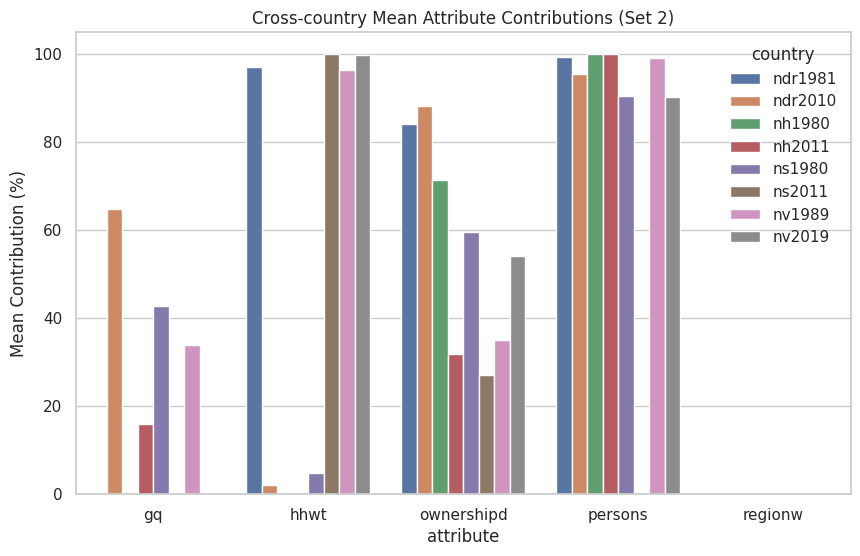

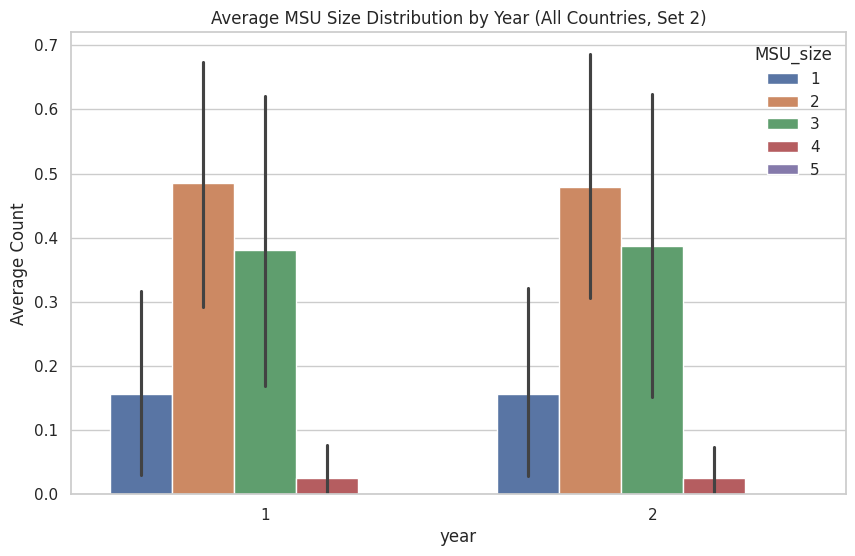

In [12]:
from glob import glob

sns.set(style="whitegrid")

#Parse Attribute Contributions
attr_dfs = []
for file in glob("*_attribute_contrib.txt"):
    # Extract country, year, sample from filename (assuming pattern like s1_v1989_attribute_contrib.txt)
    parts = file.split("_")
    sample = parts[0]  # s1
    country_code = parts[1]  # v
    year = re.findall(r'\d+', parts[1] + parts[2])[0] if len(parts) > 2 else re.findall(r'\d+', parts[1])[0]

    country_map = {"nv": "Vietnam", "ndr": "Dominican Republic", "nh": "Hungary", "ns": "Switzerland"}
    country = country_map.get(country_code.lower(), country_code)

    rows = []
    with open(file, "r") as f:
        for line in f:
            match = re.search(r"att\s+'(.+?)'\s+percentage contribution\s+([\d.]+)", line)
            if match:
                attribute = match.group(1)
                contribution = float(match.group(2))
                rows.append({"country": country, "year": int(year), "attribute": attribute, "contribution": contribution, "sample": sample})

    attr_dfs.append(pd.DataFrame(rows))

attr_df = pd.concat(attr_dfs)

#Average contributions over samples
attr_avg = attr_df.groupby(["country", "year", "attribute"])["contribution"].mean().reset_index()

#Parse Records CSVs
records_dfs = []
for file in glob("*_records.csv"):
    parts = file.split("_")
    sample = parts[0]
    country_code = parts[1]
    year = re.findall(r'\d+', file)[0]
    country = country_map.get(country_code.lower(), country_code)

    df_rec = pd.read_csv(file)
    df_rec["country"] = country
    df_rec["year"] = int(year)
    df_rec["sample"] = sample
    records_dfs.append(df_rec)

records_df = pd.concat(records_dfs)

#Parse Summary TXT for P(cm|um)
summary_data = []
for file in glob("*_summary.txt"):
    parts = file.split("_")
    sample = parts[0]
    country_code = parts[1]
    year = re.findall(r'\d+', file)[0]
    country = country_map.get(country_code.lower(), country_code)

    with open(file, "r") as f:
        content = f.read()
        match_p = re.search(r"P\(cm\|um\)\s=\s([\d.]+)", content)
        if match_p:
            p_val = float(match_p.group(1))
            summary_data.append({"country": country, "year": int(year), "sample": sample, "P_cm_um": p_val})

summary_df = pd.DataFrame(summary_data)

#Visualisations

# 7. Cross-country Attribute Contribution Comparison
plt.figure(figsize=(10, 6))
cross_attr = attr_avg.groupby(["country", "attribute"])["contribution"].mean().reset_index()
sns.barplot(data=cross_attr, x="attribute", y="contribution", hue="country")
plt.title("Cross-country Mean Attribute Contributions (Set 2)")
plt.ylabel("Mean Contribution (%)")
plt.show()

# 8. MSU Size Distribution
msu_cols = [col for col in records_df.columns if col.startswith("MSU_size_")]
msu_long = records_df.melt(id_vars=["country", "year", "sample"], value_vars=msu_cols, var_name="MSU_size", value_name="count")
msu_long["MSU_size"] = msu_long["MSU_size"].str.replace("MSU_size_", "")
msu_grouped = msu_long.groupby(["country", "year", "MSU_size"])["count"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=msu_grouped, x="year", y="count", hue="MSU_size")
plt.title("Average MSU Size Distribution by Year (All Countries, Set 2)")
plt.ylabel("Average Count")
plt.show()


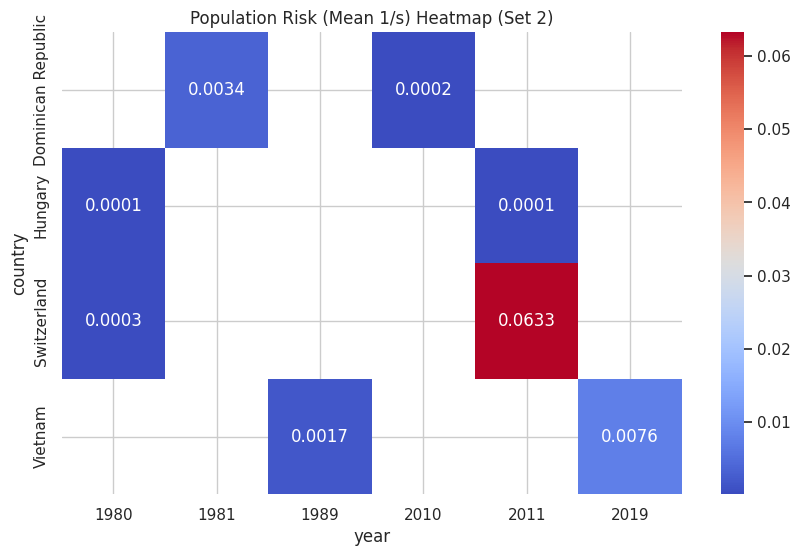

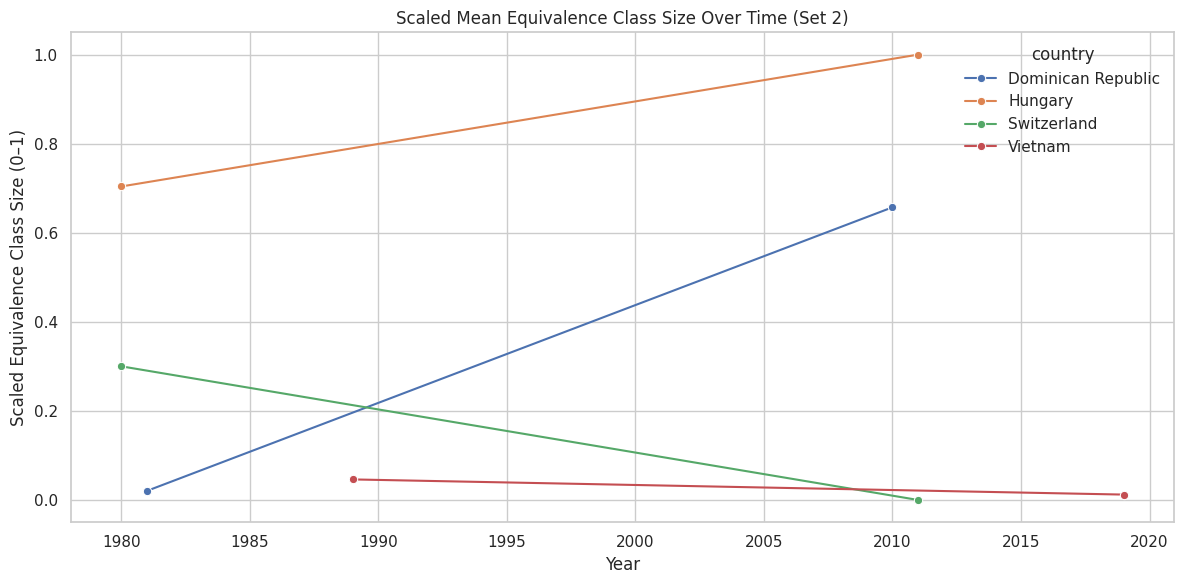

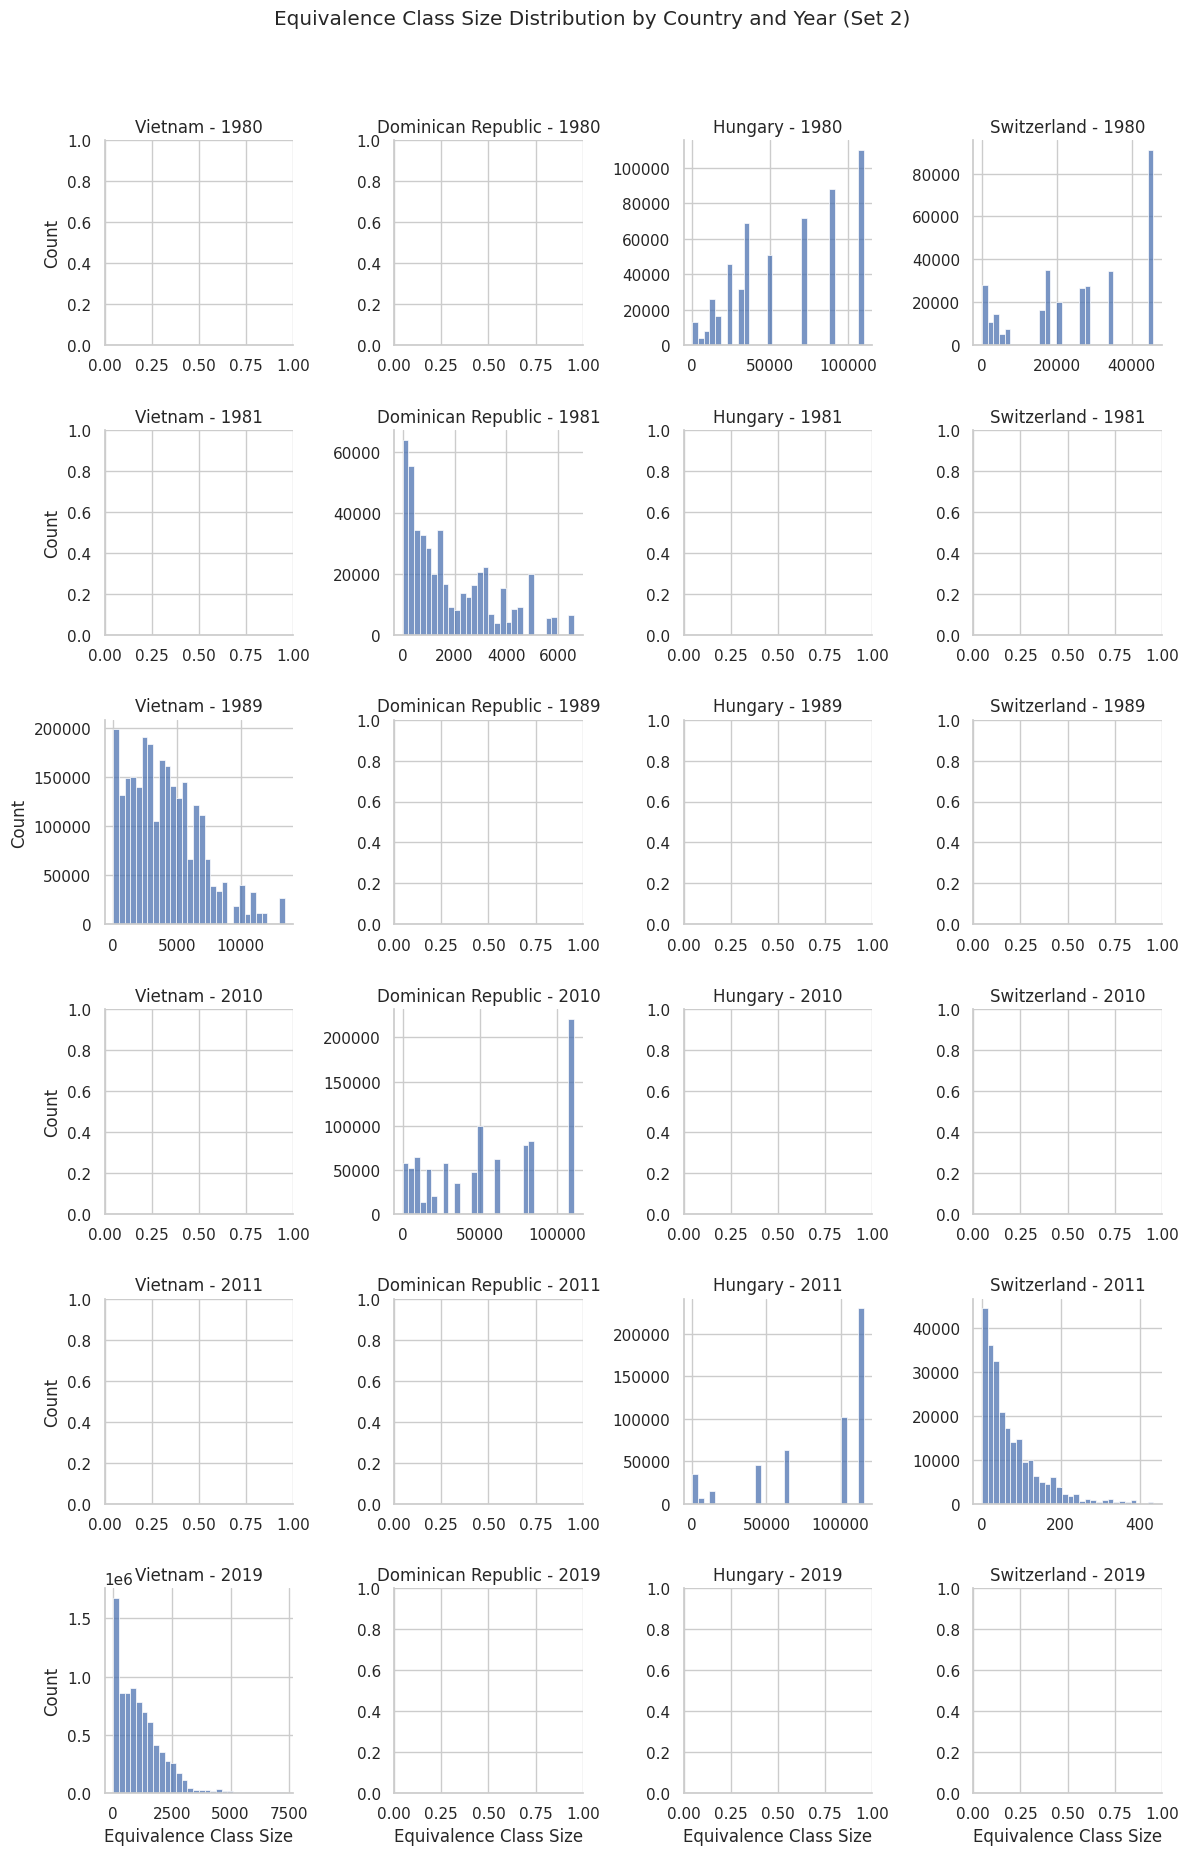

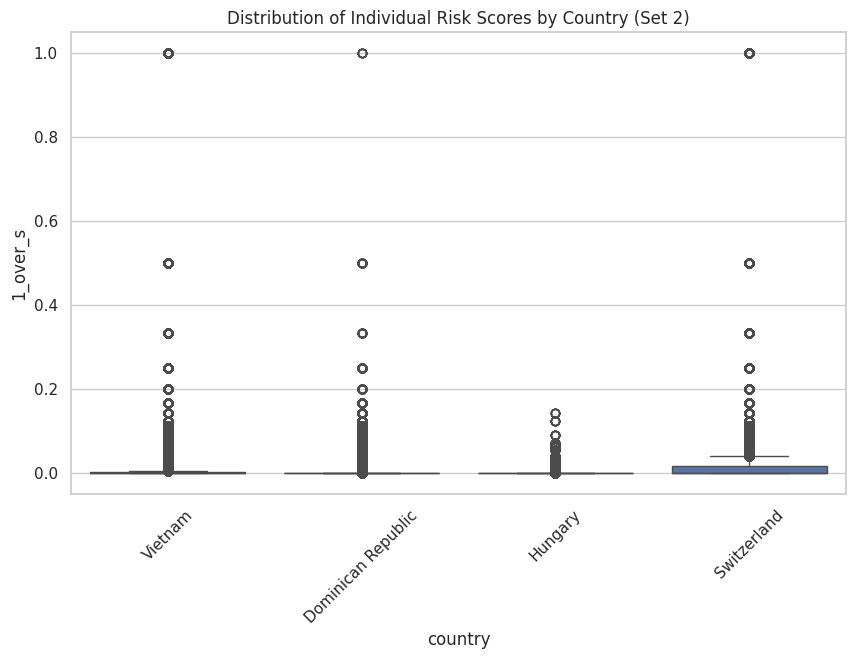

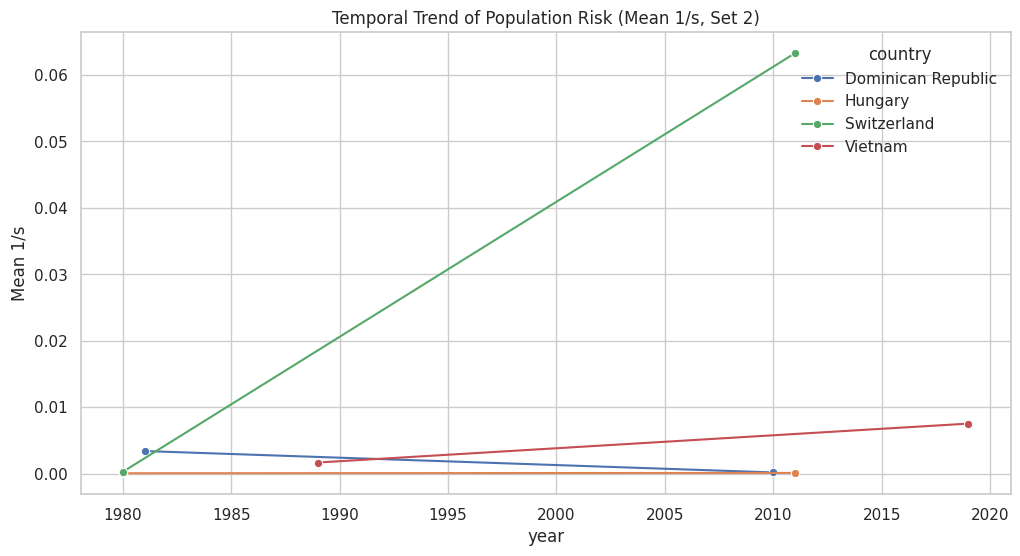

In [13]:
#File mapping and data load
file_map = {
    "nvietnam1989.csv": ("Vietnam", 1989),
    "nvietnam2019.csv": ("Vietnam", 2019),
    "ndr1981.csv": ("Dominican Republic", 1981),
    "ndr2010.csv": ("Dominican Republic", 2010),
    "nhungary1980.csv": ("Hungary", 1980),
    "nhungary2011.csv": ("Hungary", 2011),
    "nswiss1980.csv": ("Switzerland", 1980),
    "nswiss2011.csv": ("Switzerland", 2011),
}

key_vars = ["gq", "hhwt", "ownershipd", "persons", "regionw"]

dfs = []
for fname, (country, year) in file_map.items():
    df = pd.read_csv(fname)
    df["country"] = country
    df["year"] = year

    # Equivalence classes
    df["eq_class"] = df[key_vars].astype(str).agg("-".join, axis=1)
    eq_counts = df["eq_class"].value_counts()
    df["eq_class_size"] = df["eq_class"].map(eq_counts)
    df["1_over_s"] = 1 / df["eq_class_size"]

    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

#VISUALISATIONS

# 9. Heatmap of population risk (mean 1/s per country-year)
risk_summary = df_all.groupby(["country", "year"])["1_over_s"].mean().reset_index()
pivot_risk = risk_summary.pivot(index="country", columns="year", values="1_over_s")

plt.figure(figsize=(10,6))
sns.heatmap(pivot_risk, annot=True, fmt=".4f", cmap="coolwarm")
plt.title("Population Risk (Mean 1/s) Heatmap (Set 2)")
plt.show()

# 10. Mean equivalence class size over time
#Mean equivalence class size over time (scaled 0–1)
trend_df = df_all.groupby(["country", "year"])["eq_class_size"].mean().reset_index()

# Min–max normalization
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())

trend_df["eq_class_size_scaled"] = minmax(trend_df["eq_class_size"])

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=trend_df,
    x="year", y="eq_class_size_scaled",
    hue="country", marker="o"
)
plt.title("Scaled Mean Equivalence Class Size Over Time (Set 2)")
plt.ylabel("Scaled Equivalence Class Size (0–1)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# 11. Equivalence Class Size Distributions (Histograms/Density plots)
# Plot distribution of equivalence class size for each country-year
g = sns.FacetGrid(df_all, col="country", row="year", sharex=False, sharey=False)
g.map(sns.histplot, "eq_class_size", bins=30)
g.fig.suptitle("Equivalence Class Size Distribution by Country and Year (Set 2)", y=1.03)
g.set_axis_labels("Equivalence Class Size", "Count")
g.set_titles("{col_name} - {row_name}")
plt.tight_layout()
plt.show()

# 12. Boxplot of individual risk by country
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x="country", y="1_over_s")
plt.title("Distribution of Individual Risk Scores by Country (Set 2)")
plt.xticks(rotation=45)
plt.show()

# 13. Temporal risk trend (avg 1/s)
plt.figure(figsize=(12,6))
sns.lineplot(data=risk_summary, x="year", y="1_over_s", hue="country", marker="o")
plt.title("Temporal Trend of Population Risk (Mean 1/s, Set 2)")
plt.ylabel("Mean 1/s")
plt.show()

In [14]:
def compare_distribution(pop_df, sample_df, column, bins=30):
    plt.figure(figsize=(8, 5))
    sns.histplot(pop_df[column], bins=bins, color="blue", stat="density", alpha=0.4, label="Population")
    sns.histplot(sample_df[column], bins=bins, color="red", stat="density", alpha=0.4, label="Sample")
    plt.title(f"Distribution Comparison: {column}")
    plt.legend()
    plt.show()

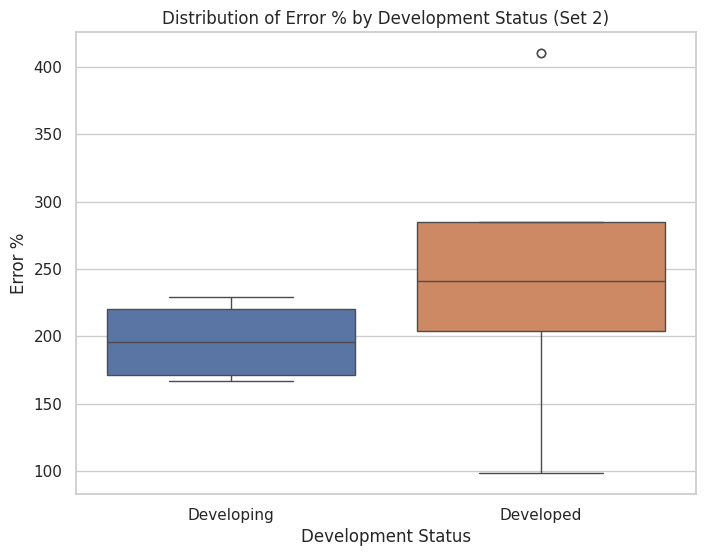

In [15]:
try:
    df_risk = pd.read_csv("nrisk_comparison.csv")
except FileNotFoundError:
    print("Error: risk_comparison.csv not found. Please upload the file.")
    exit()

# Define developed and developing countries
developed = ["Hungary", "Switzerland"]
developing = ["Vietnam", "Dominican Republic"]

# Add Development_Status column
df_risk["Development_Status"] = df_risk["Country"].apply(lambda x: "Developed" if x in developed else "Developing")

# 14. Grouped Boxplots (Developed vs Developing, Set 1)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_risk, x="Development_Status", y="Error_%", hue="Development_Status")
plt.title("Distribution of Error % by Development Status (Set 2)")
plt.ylabel("Error %")
plt.xlabel("Development Status")
plt.show()

/tmp/ipython-input-1041600334.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_error_df, x="Country_Year", y="Error_%", palette="coolwarm") # Using a diverging color palette


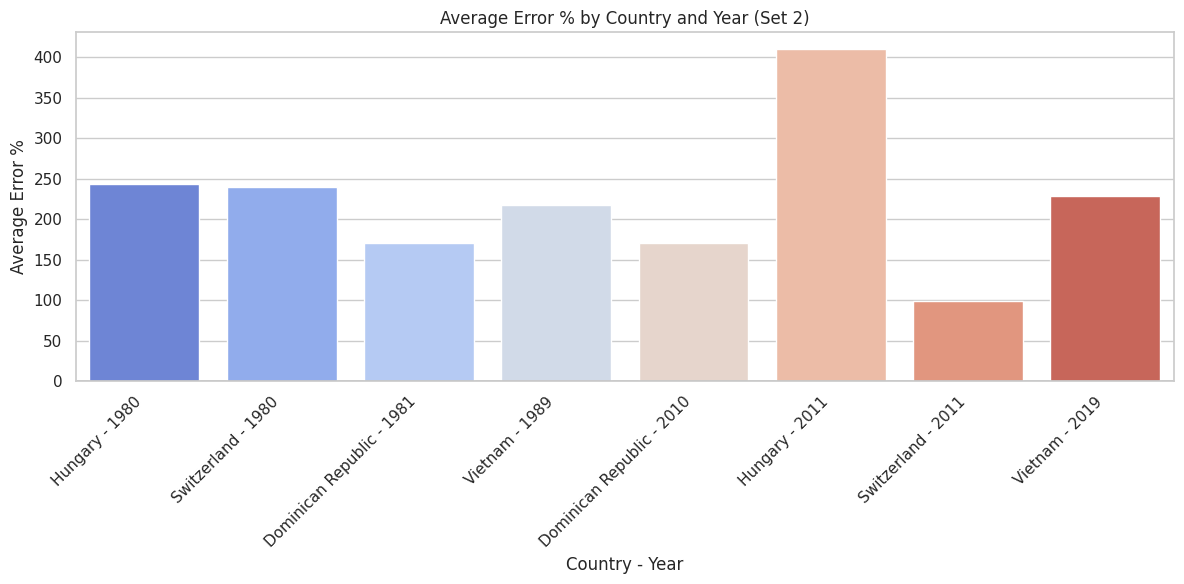

In [16]:
# Calculate average error % per country and year
avg_error_df = df_risk.groupby(["Country", "Year"])["Error_%"].mean().reset_index()

# Combine Country and Year for the x-axis label
avg_error_df["Country_Year"] = avg_error_df["Country"] + " - " + avg_error_df["Year"].astype(str)

# Sort by Year then Country for better visualization
avg_error_df = avg_error_df.sort_values(by=["Year", "Country"])

# 15. Bias Direction and Magnitude by Country-Year (Diverging Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_error_df, x="Country_Year", y="Error_%", palette="coolwarm") # Using a diverging color palette

plt.axhline(0, color='black', linewidth=1) # Add a horizontal line at 0 for reference
plt.ylabel("Average Error %")
plt.xlabel("Country - Year")
plt.title("Average Error % by Country and Year (Set 2)")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [17]:
from glob import glob
import re

#Load and Inspect Risk Comparison Data
print("--- Risk Comparison Data (risk_comparison.csv) ---")
try:
    df_risk = pd.read_csv("nrisk_comparison.csv")
    display(df_risk.head())
    print("\nInfo:")
    display(df_risk.info())
    print("\nDescription:")
    display(df_risk.describe())
except FileNotFoundError:
    print("Error: risk_comparison.csv not found. Please upload the file.")
    df_risk = None # Set to None if file not found

#Load and Inspect Attribute Contribution Data
print("\n--- Attribute Contribution Data (*_attribute_contrib.txt) ---")
def parse_attr_contrib(file_path):
    """
    Reads an attribute contribution text file and returns a DataFrame with Country, Year, Sample, Attribute, Contribution%.
    """
    match = re.search(r"(s\d)_([a-z]{1,3})(\d{4})_attribute_contrib", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame()

    country_map = {'nv': 'Vietnam', 'ndr': 'Dominican Republic', 'nh': 'Hungary', 'ns': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code)

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()

    rows = []
    with open(file_path, 'r') as f:
        for line in f:
            match_attr = re.match(r"col#\d+\s+att\s+'(.+)'\s+percentage contribution\s+([\d.]+)", line.strip())
            if match_attr:
                attribute = match_attr.group(1)
                contrib = float(match_attr.group(2))
                rows.append({"Country": country, "Year": year, "Sample": sample,
                             "Attribute": attribute, "Contribution_%": contrib})
    return pd.DataFrame(rows)

attr_files = glob("*_attribute_contrib.txt")
if attr_files:
    attr_df = pd.concat([parse_attr_contrib(f) for f in attr_files], ignore_index=True)
    print(f"Found {len(attr_files)} attribute contribution files.")
    display(attr_df.head())
    print("\nInfo:")
    display(attr_df.info())
    print("\nDescription:")
    display(attr_df.describe(include='all'))
else:
    print("No attribute contribution files found (*_attribute_contrib.txt).")
    attr_df = None

#Load and Inspect Records Data
print("\n--- Records Data (*_records.csv) ---")
records_files = glob("*_records.csv")
records_dfs = []
if records_files:
    for f in records_files:
        match = re.search(r"(s\d)_([a-z]{1,3})(\d{4})_records", f, re.IGNORECASE)
        if match:
            sample = match.group(1)
            country_code = match.group(2)
            year = int(match.group(3))
        else:
            print(f"Warning: Filename did not match pattern: {f}")
            continue

        country_map = {'nv': 'Vietnam', 'ndr': 'Dominican Republic', 'nh': 'Hungary', 'ns': 'Switzerland'}
        country = country_map.get(country_code.lower(), country_code)

        if country is None:
             print(f"Warning: Could not determine country for file: {f}")
             continue

        try:
            df_temp = pd.read_csv(f)
            df_temp["Country"] = country
            df_temp["Year"] = year
            df_temp["Sample"] = sample
            records_dfs.append(df_temp)
        except Exception as e:
            print(f"Error reading file {f}: {e}")


    if records_dfs:
        records_df = pd.concat(records_dfs, ignore_index=True)
        print(f"Found {len(records_files)} records files.")
        display(records_df.head())
        print("\nInfo:")
        display(records_df.info())
        print("\nDescription:")
        display(records_df.describe(include='all'))
    else:
        print("No valid records data found.")
        records_df = None
else:
    print("No records files found (*_records.csv).")
    records_df = None


#Load and Inspect Summary Data
print("\n--- Summary Data (*_summary.txt) ---")
def parse_summary(file_path):
    """
    Reads a SUDA summary text file and extracts P(cm|um) and Sample Unique count.
    """
    match = re.search(r"(s\d)_([a-z]{1,3})(\d{4})_summary", file_path, re.IGNORECASE)
    if match:
        sample = match.group(1)
        country_code = match.group(2)
        year = int(match.group(3))
    else:
        print(f"Warning: Filename did not match pattern: {file_path}")
        return pd.DataFrame()

    country_map = {'nv': 'Vietnam', 'ndr': 'Dominican Republic', 'nh': 'Hungary', 'ns': 'Switzerland'}
    country = country_map.get(country_code.lower(), country_code)

    if country is None:
         print(f"Warning: Could not determine country for file: {file_path}")
         return pd.DataFrame()

    p_cm_um, sample_uniques = None, None
    try:
        with open(file_path, 'r') as f:
            for line in f:
                if "P(cm|um)" in line:
                    p_cm_um = float(line.split("=")[1].strip())
                if "Sample Unique records" in line:
                    sample_uniques = int(line.split()[-1])
        return pd.DataFrame([{"Country": country, "Year": year, "Sample": sample,
                              "P_cm_um": p_cm_um, "Sample_Uniques": sample_uniques}])
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return pd.DataFrame()


summary_files = glob("*_summary.txt")
if summary_files:
    summary_df = pd.concat([parse_summary(f) for f in summary_files], ignore_index=True)
    print(f"Found {len(summary_files)} summary files.")
    display(summary_df.head())
    print("\nInfo:")
    display(summary_df.info())
    print("\nDescription:")
    display(summary_df.describe(include='all'))
else:
    print("No summary files found (*_summary.txt).")
    summary_df = None

#Load and Inspect Census Data
print("\n--- Census Data (*.csv excluding others) ---")
# Assuming census files are the remaining CSVs that are not risk_comparison or records
all_csv_files = glob("*.csv")
census_files = [f for f in all_csv_files if f != "nrisk_comparison.csv" and not f.endswith("_records.csv")]

census_dfs = {}
if census_files:
    print(f"Found {len(census_files)} potential census files.")
    for f in census_files:
        print(f"\nInspecting {f}:")
        try:
            df_temp = pd.read_csv(f)
            census_dfs[f] = df_temp
            display(df_temp.head())
            print("\nInfo:")
            display(df_temp.info())
            print("\nDescription:")
            display(df_temp.describe(include='all'))
        except Exception as e:
            print(f"Error reading file {f}: {e}")
else:
    print("No potential census files found.")
    census_dfs = {}

--- Risk Comparison Data (risk_comparison.csv) ---


,Country,Year,Sample,True_Risk,SUDA_Score,Error_%
0,Vietnam,1989,1,4483,14236,217.555209
1,Vietnam,1989,2,4483,14268,218.269016
2,Vietnam,2019,1,62254,203780,227.336396
3,Vietnam,2019,2,62254,204992,229.283259
4,Dominican Republic,1981,1,1633,4440,171.892223



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     16 non-null     object 
 1   Year        16 non-null     int64  
 2   Sample      16 non-null     int64  
 3   True_Risk   16 non-null     int64  
 4   SUDA_Score  16 non-null     int64  
 5   Error_%     16 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 900.0+ bytes


None


Description:


,Year,Sample,True_Risk,SUDA_Score,Error_%
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1997.625000,1.500000,10481.125000,31790.500000,222.265406
std,16.082599,0.516398,20805.075435,68121.670113,87.020221
min,1980.000000,1.000000,49.000000,168.000000,98.286966
25%,1980.750000,1.000000,91.500000,348.000000,171.218616
50%,1999.500000,1.500000,917.000000,2474.000000,222.802706
75%,2011.000000,2.000000,7127.500000,18167.000000,240.259740
max,2019.000000,2.000000,62254.000000,204992.000000,410.144928



--- Attribute Contribution Data (*_attribute_contrib.txt) ---
Found 16 attribute contribution files.


,Country,Year,Sample,Attribute,Contribution_%
0,Switzerland,1980,s2,persons,90.4762
1,Switzerland,1980,s2,hhwt,4.7619
2,Switzerland,1980,s2,gq,42.8571
3,Switzerland,1980,s2,regionw,0.0000
4,Switzerland,1980,s2,ownershipd,59.5238



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         80 non-null     object 
 1   Year            80 non-null     int64  
 2   Sample          80 non-null     object 
 3   Attribute       80 non-null     object 
 4   Contribution_%  80 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 3.3+ KB


None


Description:


,Country,Year,Sample,Attribute,Contribution_%
count,80,80.000000,80,80,80.000000
unique,4,NaN,2,5,NaN
top,Switzerland,NaN,s2,persons,NaN
freq,20,NaN,40,16,NaN
mean,NaN,1997.625000,NaN,NaN,42.100110
std,NaN,15.670156,NaN,NaN,42.053834
min,NaN,1980.000000,NaN,NaN,0.000000
25%,NaN,1980.750000,NaN,NaN,0.000000
50%,NaN,1999.500000,NaN,NaN,32.767750
75%,NaN,2011.000000,NaN,NaN,90.364150



--- Records Data (*_records.csv) ---
Found 16 records files.


,ID,suda_score,proportion_of_lattice,MSU_size_1,MSU_size_2,MSU_size_3,MSU_size_4,MSU_size_5,persons_contribution_%,hhwt_contribution_%,gq_contribution_%,regionw_contribution_%,ownershipd_contribution_%,Country,Year,Sample
0,2964,32,0.266667,2,0,0,0,0,0.0,50.0,50.0,0,0.0,Switzerland,1980,s2
1,439,8,0.066667,0,1,0,0,0,100.0,0.0,100.0,0,0.0,Switzerland,1980,s2
2,376,8,0.066667,0,1,0,0,0,100.0,0.0,100.0,0,0.0,Switzerland,1980,s2
3,1846,8,0.066667,0,1,0,0,0,100.0,0.0,100.0,0,0.0,Switzerland,1980,s2
4,832,8,0.066667,0,1,0,0,0,100.0,0.0,100.0,0,0.0,Switzerland,1980,s2



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86347 entries, 0 to 86346
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         86347 non-null  int64  
 1   suda_score                 86347 non-null  int64  
 2   proportion_of_lattice      86347 non-null  float64
 3   MSU_size_1                 86347 non-null  int64  
 4   MSU_size_2                 86347 non-null  int64  
 5   MSU_size_3                 86347 non-null  int64  
 6   MSU_size_4                 86347 non-null  int64  
 7   MSU_size_5                 86347 non-null  int64  
 8   persons_contribution_%     86347 non-null  float64
 9   hhwt_contribution_%        86347 non-null  float64
 10  gq_contribution_%          86347 non-null  float64
 11  regionw_contribution_%     86347 non-null  int64  
 12  ownershipd_contribution_%  86347 non-null  float64
 13  Country                    86347 non-nu

None


Description:


,ID,suda_score,proportion_of_lattice,MSU_size_1,MSU_size_2,MSU_size_3,MSU_size_4,MSU_size_5,persons_contribution_%,hhwt_contribution_%,gq_contribution_%,regionw_contribution_%,ownershipd_contribution_%,Country,Year,Sample
count,86347.000000,86347.000000,86347.000000,86347.000000,86347.000000,86347.000000,86347.000000,86347.0,86347.000000,86347.000000,86347.000000,86347.0,86347.000000,86347,86347.00000,86347
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vietnam,NaN,s2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79233,NaN,43284
mean,35933.833115,5.890743,0.049089,0.032555,0.373481,0.588567,0.013874,0.0,88.920287,99.443718,3.590937,0.0,66.201103,NaN,2015.54003,NaN
std,25319.564575,2.810479,0.023421,0.177599,0.496421,0.496548,0.116970,0.0,31.175868,7.250106,18.448172,0.0,47.088170,NaN,9.43997,NaN
min,0.000000,2.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,NaN,1980.00000,NaN
25%,12885.500000,4.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,100.000000,100.000000,0.000000,0.0,0.000000,NaN,2019.00000,NaN
50%,33621.000000,4.000000,0.033333,0.000000,0.000000,1.000000,0.000000,0.0,100.000000,100.000000,0.000000,0.0,100.000000,NaN,2019.00000,NaN
75%,58159.000000,8.000000,0.066667,0.000000,1.000000,1.000000,0.000000,0.0,100.000000,100.000000,0.000000,0.0,100.000000,NaN,2019.00000,NaN



--- Summary Data (*_summary.txt) ---
Found 16 summary files.


,Country,Year,Sample,P_cm_um,Sample_Uniques
0,Dominican Republic,2010,s1,0.011020,100
1,Dominican Republic,1981,s2,0.210593,999
2,Hungary,2011,s2,0.006644,27
3,Switzerland,2011,s2,0.995798,2370
4,Hungary,1980,s1,0.003358,18



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         16 non-null     object 
 1   Year            16 non-null     int64  
 2   Sample          16 non-null     object 
 3   P_cm_um         16 non-null     float64
 4   Sample_Uniques  16 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 772.0+ bytes


None


Description:


,Country,Year,Sample,P_cm_um,Sample_Uniques
count,16,16.000000,16,16.000000,16.000000
unique,4,NaN,2,NaN,NaN
top,Dominican Republic,NaN,s1,NaN,NaN
freq,4,NaN,8,NaN,NaN
mean,NaN,1997.625000,NaN,0.225937,5396.687500
std,NaN,16.082599,NaN,0.335608,12250.449171
min,NaN,1980.000000,NaN,0.003358,18.000000
25%,NaN,1980.750000,NaN,0.009846,36.750000
50%,NaN,1999.500000,NaN,0.065561,549.500000
75%,NaN,2011.000000,NaN,0.269531,2521.500000



--- Census Data (*.csv excluding others) ---
Found 26 potential census files.

Inspecting s1_ndr1981.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,176097,214,1981,14,6,10,21,210
1,122635,214,1981,6,7,10,21,110
2,473799,214,1981,6,11,10,21,110
3,169976,214,1981,6,7,10,21,110
4,165698,214,1981,2,6,10,21,120



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4758 non-null   int64
 1   country     4758 non-null   int64
 2   year        4758 non-null   int64
 3   persons     4758 non-null   int64
 4   hhwt        4758 non-null   int64
 5   gq          4758 non-null   int64
 6   regionw     4758 non-null   int64
 7   ownershipd  4758 non-null   int64
dtypes: int64(8)
memory usage: 297.5 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,4758.000000,4758.0,4758.0,4758.000000,4758.000000,4758.0,4758.0,4758.000000
mean,238186.692098,214.0,1981.0,6.948928,11.785834,10.0,21.0,138.791509
std,134949.980702,0.0,0.0,3.542486,6.959669,0.0,0.0,49.837978
min,720.000000,214.0,1981.0,1.000000,1.000000,10.0,21.0,110.000000
25%,122118.250000,214.0,1981.0,4.000000,6.000000,10.0,21.0,110.000000
50%,236942.500000,214.0,1981.0,7.000000,11.000000,10.0,21.0,110.000000
75%,353514.500000,214.0,1981.0,9.000000,16.000000,10.0,21.0,140.000000
max,475814.000000,214.0,1981.0,37.000000,25.000000,10.0,21.0,290.000000



Inspecting s2_nv1989.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,483094,704,1989,6,54.20,10,34,100
1,2303226,704,1989,5,4.61,10,34,999
2,2428863,704,1989,7,40.46,10,34,100
3,566116,704,1989,7,16.77,10,34,999
4,1359045,704,1989,5,11.28,10,34,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26269 non-null  int64  
 1   country     26269 non-null  int64  
 2   year        26269 non-null  int64  
 3   persons     26269 non-null  int64  
 4   hhwt        26269 non-null  float64
 5   gq          26269 non-null  int64  
 6   regionw     26269 non-null  int64  
 7   ownershipd  26269 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.6 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,2.626900e+04,26269.0,26269.0,26269.000000,26269.000000,26269.000000,26269.0,26269.000000
mean,1.310566e+06,704.0,1989.0,6.811984,23.949084,10.654003,34.0,738.992805
std,7.630560e+05,0.0,0.0,6.739752,18.784380,2.472355,0.0,400.881966
min,1.680000e+02,704.0,1989.0,1.000000,1.960000,10.000000,34.0,100.000000
25%,6.484830e+05,704.0,1989.0,4.000000,9.400000,10.000000,34.0,211.000000
50%,1.311260e+06,704.0,1989.0,6.000000,19.620000,10.000000,34.0,999.000000
75%,1.971160e+06,704.0,1989.0,8.000000,34.780000,10.000000,34.0,999.000000
max,2.626835e+06,704.0,1989.0,99.000000,91.100000,20.000000,34.0,999.000000



Inspecting s1_nh1980.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,379839,348,1980,6,20,10,41,100
1,433604,348,1980,2,20,10,41,210
2,333182,348,1980,4,20,10,41,100
3,262762,348,1980,2,20,10,41,100
4,358137,348,1980,5,20,10,41,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5360 non-null   int64
 1   country     5360 non-null   int64
 2   year        5360 non-null   int64
 3   persons     5360 non-null   int64
 4   hhwt        5360 non-null   int64
 5   gq          5360 non-null   int64
 6   regionw     5360 non-null   int64
 7   ownershipd  5360 non-null   int64
dtypes: int64(8)
memory usage: 335.1 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,5360.000000,5360.0,5360.0,5360.000000,5360.0,5360.000000,5360.0,5360.00000
mean,267451.471828,348.0,1980.0,3.454291,20.0,10.309701,41.0,125.44403
std,155033.205468,0.0,0.0,1.649374,0.0,1.732530,0.0,53.30426
min,270.000000,348.0,1980.0,1.000000,20.0,10.000000,41.0,0.00000
25%,131195.250000,348.0,1980.0,2.000000,20.0,10.000000,41.0,100.00000
50%,267699.000000,348.0,1980.0,3.000000,20.0,10.000000,41.0,100.00000
75%,402809.250000,348.0,1980.0,4.000000,20.0,10.000000,41.0,210.00000
max,536007.000000,348.0,1980.0,18.000000,20.0,20.000000,41.0,290.00000



Inspecting s2_ndr1981.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,462200,214,1981,7,5,10,21,110
1,258305,214,1981,6,3,10,21,210
2,372158,214,1981,5,11,10,21,110
3,78973,214,1981,6,14,10,21,140
4,61018,214,1981,6,23,10,21,140



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4758 non-null   int64
 1   country     4758 non-null   int64
 2   year        4758 non-null   int64
 3   persons     4758 non-null   int64
 4   hhwt        4758 non-null   int64
 5   gq          4758 non-null   int64
 6   regionw     4758 non-null   int64
 7   ownershipd  4758 non-null   int64
dtypes: int64(8)
memory usage: 297.5 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,4758.000000,4758.0,4758.0,4758.000000,4758.000000,4758.0,4758.0,4758.000000
mean,242155.228878,214.0,1981.0,6.915721,11.790668,10.0,21.0,138.625473
std,136306.717729,0.0,0.0,3.525194,6.972686,0.0,0.0,49.466378
min,241.000000,214.0,1981.0,1.000000,1.000000,10.0,21.0,110.000000
25%,128679.500000,214.0,1981.0,4.000000,6.000000,10.0,21.0,110.000000
50%,240736.500000,214.0,1981.0,7.000000,11.000000,10.0,21.0,110.000000
75%,359569.500000,214.0,1981.0,9.000000,16.000000,10.0,21.0,140.000000
max,475611.000000,214.0,1981.0,31.000000,25.000000,10.0,21.0,290.000000



Inspecting s1_ndr2010.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,73435,214,2010,3,10,10,21,210
1,501765,214,2010,6,10,10,21,110
2,69836,214,2010,3,10,22,21,210
3,337433,214,2010,9,10,10,21,110
4,479518,214,2010,2,10,10,21,110



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  9437 non-null   int64
 1   country     9437 non-null   int64
 2   year        9437 non-null   int64
 3   persons     9437 non-null   int64
 4   hhwt        9437 non-null   int64
 5   gq          9437 non-null   int64
 6   regionw     9437 non-null   int64
 7   ownershipd  9437 non-null   int64
dtypes: int64(8)
memory usage: 589.9 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,9437.000000,9437.0,9437.0,9437.000000,9437.000000,9437.000000,9437.0,9437.000000
mean,466057.400975,214.0,2010.0,4.534280,9.989403,10.819964,21.0,154.151531
std,270588.641061,0.0,0.0,2.101801,0.325369,3.035000,0.0,56.419160
min,350.000000,214.0,2010.0,1.000000,0.000000,10.000000,21.0,0.000000
25%,233001.000000,214.0,2010.0,3.000000,10.000000,10.000000,21.0,110.000000
50%,459568.000000,214.0,2010.0,4.000000,10.000000,10.000000,21.0,110.000000
75%,694335.000000,214.0,2010.0,6.000000,10.000000,10.000000,21.0,210.000000
max,943776.000000,214.0,2010.0,30.000000,10.000000,29.000000,21.0,290.000000



Inspecting ncountry_risk_summary.csv:


,Country,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
0,Dominican Republic,917.0,2481.0,170.595888
1,Hungary,59.0,260.0,326.501035
2,Switzerland,7580.0,15102.0,168.853732
3,Vietnam,33368.5,109319.0,223.110970



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            4 non-null      object 
 1   Avg_True_Risk      4 non-null      float64
 2   Avg_SUDA_Risk      4 non-null      float64
 3   Avg_Error_Percent  4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 260.0+ bytes


None


Description:


,Country,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
count,4,4.000000,4.000000,4.000000
unique,4,NaN,NaN,NaN
top,Dominican Republic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,10481.125000,31790.500000,222.265406
std,NaN,15624.144107,52097.324196,73.910593
min,NaN,59.000000,260.000000,168.853732
25%,NaN,702.500000,1925.750000,170.160349
50%,NaN,4248.500000,8791.500000,196.853429
75%,NaN,14027.125000,38656.250000,248.958486



Inspecting nswiss1980.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,756,1980,4,20,10,44,210
1,2,756,1980,4,20,10,44,210
2,3,756,1980,4,20,10,44,210
3,4,756,1980,4,20,10,44,210
4,5,756,1980,2,20,10,44,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317803 entries, 0 to 317802
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  317803 non-null  int64
 1   country     317803 non-null  int64
 2   year        317803 non-null  int64
 3   persons     317803 non-null  int64
 4   hhwt        317803 non-null  int64
 5   gq          317803 non-null  int64
 6   regionw     317803 non-null  int64
 7   ownershipd  317803 non-null  int64
dtypes: int64(8)
memory usage: 19.4 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,317803.000000,317803.0,317803.0,317803.000000,317803.000000,317803.000000,317803.0,317803.000000
mean,158902.000000,756.0,1980.0,3.341161,19.998930,10.361576,44.0,169.743461
std,91741.968137,0.0,0.0,1.663107,0.146273,1.993685,0.0,60.356120
min,1.000000,756.0,1980.0,1.000000,0.000000,10.000000,44.0,0.000000
25%,79451.500000,756.0,1980.0,2.000000,20.000000,10.000000,44.0,100.000000
50%,158902.000000,756.0,1980.0,3.000000,20.000000,10.000000,44.0,210.000000
75%,238352.500000,756.0,1980.0,4.000000,20.000000,10.000000,44.0,210.000000
max,317803.000000,756.0,1980.0,15.000000,20.000000,29.000000,44.0,252.000000



Inspecting s1_ns2011.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,61267,756,2011,1,15.26,10,44,100
1,158813,756,2011,1,9.47,10,44,210
2,8518,756,2011,1,9.52,10,44,192
3,163578,756,2011,1,9.00,10,44,223
4,3184,756,2011,1,10.91,10,44,223



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2380 non-null   int64  
 1   country     2380 non-null   int64  
 2   year        2380 non-null   int64  
 3   persons     2380 non-null   int64  
 4   hhwt        2380 non-null   float64
 5   gq          2380 non-null   int64  
 6   regionw     2380 non-null   int64  
 7   ownershipd  2380 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 148.9 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,2380.000000,2380.0,2380.0,2380.0,2380.000000,2380.0,2380.0,2380.000000
mean,112149.003361,756.0,2011.0,1.0,21.130387,10.0,44.0,268.121849
std,72188.639265,0.0,0.0,0.0,12.460905,0.0,0.0,241.982901
min,9.000000,756.0,2011.0,1.0,2.090000,10.0,44.0,100.000000
25%,49209.250000,756.0,2011.0,1.0,10.900000,10.0,44.0,192.000000
50%,108230.000000,756.0,2011.0,1.0,18.240000,10.0,44.0,210.000000
75%,176175.250000,756.0,2011.0,1.0,31.282500,10.0,44.0,223.000000
max,237977.000000,756.0,2011.0,1.0,71.150000,10.0,44.0,999.000000



Inspecting ndr1981.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,214,1981,4,22,10,21,210
1,2,214,1981,4,22,10,21,210
2,3,214,1981,4,22,10,21,210
3,4,214,1981,4,22,10,21,210
4,5,214,1981,6,22,10,21,120



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475829 entries, 0 to 475828
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  475829 non-null  int64
 1   country     475829 non-null  int64
 2   year        475829 non-null  int64
 3   persons     475829 non-null  int64
 4   hhwt        475829 non-null  int64
 5   gq          475829 non-null  int64
 6   regionw     475829 non-null  int64
 7   ownershipd  475829 non-null  int64
dtypes: int64(8)
memory usage: 29.0 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,475829.000000,475829.0,475829.0,475829.000000,475829.000000,475829.0,475829.0,475829.000000
mean,237915.000000,214.0,1981.0,6.800794,11.680934,10.0,21.0,131.420784
std,137360.144957,0.0,0.0,3.098774,6.883876,0.0,0.0,41.328037
min,1.000000,214.0,1981.0,1.000000,1.000000,10.0,21.0,110.000000
25%,118958.000000,214.0,1981.0,5.000000,6.000000,10.0,21.0,110.000000
50%,237915.000000,214.0,1981.0,7.000000,11.000000,10.0,21.0,110.000000
75%,356872.000000,214.0,1981.0,8.000000,16.000000,10.0,21.0,140.000000
max,475829.000000,214.0,1981.0,37.000000,25.000000,10.0,21.0,290.000000



Inspecting s2_nv2019.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,6687066,704,2019,1,5.91,10,34,214
1,6250607,704,2019,2,39.00,10,34,100
2,6601970,704,2019,3,22.84,10,34,100
3,6008157,704,2019,8,11.54,10,34,100
4,1772395,704,2019,2,5.69,10,34,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82367 entries, 0 to 82366
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  82367 non-null  int64  
 1   country     82367 non-null  int64  
 2   year        82367 non-null  int64  
 3   persons     82367 non-null  int64  
 4   hhwt        82367 non-null  float64
 5   gq          82367 non-null  int64  
 6   regionw     82367 non-null  int64  
 7   ownershipd  82367 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.0 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,8.236700e+04,82367.0,82367.0,82367.000000,82367.000000,82367.0,82367.0,82367.000000
mean,4.366801e+06,704.0,2019.0,4.298566,13.363785,10.0,34.0,122.582454
std,2.353724e+06,0.0,0.0,2.233568,8.181680,0.0,0.0,59.098814
min,7.900000e+01,704.0,2019.0,1.000000,0.940000,10.0,34.0,0.000000
25%,2.365905e+06,704.0,2019.0,3.000000,8.380000,10.0,34.0,100.000000
50%,4.667198e+06,704.0,2019.0,4.000000,11.210000,10.0,34.0,100.000000
75%,6.367518e+06,704.0,2019.0,5.000000,15.700000,10.0,34.0,100.000000
max,8.236694e+06,704.0,2019.0,25.000000,121.520000,10.0,34.0,999.000000



Inspecting nhungary2011.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,348,2011,3,20,10,41,100
1,2,348,2011,3,20,10,41,100
2,3,348,2011,3,20,10,41,100
3,4,348,2011,1,20,10,41,100
4,5,348,2011,3,20,10,41,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496762 entries, 0 to 496761
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  496762 non-null  int64
 1   country     496762 non-null  int64
 2   year        496762 non-null  int64
 3   persons     496762 non-null  int64
 4   hhwt        496762 non-null  int64
 5   gq          496762 non-null  int64
 6   regionw     496762 non-null  int64
 7   ownershipd  496762 non-null  int64
dtypes: int64(8)
memory usage: 30.3 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,496762.000000,496762.0,496762.0,496762.000000,496762.0,496762.000000,496762.0,496762.000000
mean,248381.500000,348.0,2011.0,3.234660,20.0,10.242007,41.0,99.269872
std,143402.981548,0.0,0.0,1.993454,0.0,1.536720,0.0,24.333643
min,1.000000,348.0,2011.0,1.000000,20.0,10.000000,41.0,0.000000
25%,124191.250000,348.0,2011.0,2.000000,20.0,10.000000,41.0,100.000000
50%,248381.500000,348.0,2011.0,3.000000,20.0,10.000000,41.0,100.000000
75%,372571.750000,348.0,2011.0,4.000000,20.0,10.000000,41.0,100.000000
max,496762.000000,348.0,2011.0,30.000000,20.0,20.000000,41.0,200.000000



Inspecting ndev_status_summary.csv:


,Development_Status,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
0,Developed,3819.50,7681.0,247.677384
1,Developing,17142.75,55900.0,196.853429



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Development_Status  2 non-null      object 
 1   Avg_True_Risk       2 non-null      float64
 2   Avg_SUDA_Risk       2 non-null      float64
 3   Avg_Error_Percent   2 non-null      float64
dtypes: float64(3), object(1)
memory usage: 196.0+ bytes


None


Description:


,Development_Status,Avg_True_Risk,Avg_SUDA_Risk,Avg_Error_Percent
count,2,2.000000,2.000000,2.000000
unique,2,NaN,NaN,NaN
top,Developed,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,10481.125000,31790.500000,222.265406
std,NaN,9420.960422,34095.981882,35.937963
min,NaN,3819.500000,7681.000000,196.853429
25%,NaN,7150.312500,19735.750000,209.559418
50%,NaN,10481.125000,31790.500000,222.265406
75%,NaN,13811.937500,43845.250000,234.971395



Inspecting s1_nv1989.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1393939,704,1989,9,14.32,10,34,999
1,2547001,704,1989,7,8.53,10,34,999
2,218404,704,1989,6,36.42,10,34,100
3,2524296,704,1989,6,91.10,10,34,999
4,1569287,704,1989,8,6.52,10,34,999



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26269 non-null  int64  
 1   country     26269 non-null  int64  
 2   year        26269 non-null  int64  
 3   persons     26269 non-null  int64  
 4   hhwt        26269 non-null  float64
 5   gq          26269 non-null  int64  
 6   regionw     26269 non-null  int64  
 7   ownershipd  26269 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 1.6 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,2.626900e+04,26269.0,26269.0,26269.000000,26269.000000,26269.000000,26269.0,26269.000000
mean,1.310194e+06,704.0,1989.0,6.800030,23.989773,10.653622,34.0,737.443222
std,7.640024e+05,0.0,0.0,6.769719,18.761392,2.471686,0.0,401.614758
min,2.240000e+02,704.0,1989.0,1.000000,1.960000,10.000000,34.0,100.000000
25%,6.434630e+05,704.0,1989.0,4.000000,11.280000,10.000000,34.0,211.000000
50%,1.306296e+06,704.0,1989.0,6.000000,19.620000,10.000000,34.0,999.000000
75%,1.973743e+06,704.0,1989.0,8.000000,34.780000,10.000000,34.0,999.000000
max,2.626909e+06,704.0,1989.0,99.000000,91.100000,20.000000,34.0,999.000000



Inspecting s1_ns1980.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,622,756,1980,4,20,10,44,210
1,152103,756,1980,1,20,10,44,210
2,209193,756,1980,2,20,10,44,100
3,157182,756,1980,3,20,10,44,100
4,299583,756,1980,3,20,10,44,210



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  3178 non-null   int64
 1   country     3178 non-null   int64
 2   year        3178 non-null   int64
 3   persons     3178 non-null   int64
 4   hhwt        3178 non-null   int64
 5   gq          3178 non-null   int64
 6   regionw     3178 non-null   int64
 7   ownershipd  3178 non-null   int64
dtypes: int64(8)
memory usage: 198.8 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,3178.000000,3178.0,3178.0,3178.000000,3178.000000,3178.000000,3178.0,3178.000000
mean,156324.432977,756.0,1980.0,3.378540,19.993707,10.391441,44.0,169.144745
std,91655.290343,0.0,0.0,1.748385,0.354775,2.083634,0.0,61.041520
min,63.000000,756.0,1980.0,1.000000,0.000000,10.000000,44.0,0.000000
25%,79490.250000,756.0,1980.0,2.000000,20.000000,10.000000,44.0,100.000000
50%,152282.500000,756.0,1980.0,3.000000,20.000000,10.000000,44.0,210.000000
75%,236294.250000,756.0,1980.0,4.000000,20.000000,10.000000,44.0,210.000000
max,317690.000000,756.0,1980.0,15.000000,20.000000,29.000000,44.0,252.000000



Inspecting s1_nh2011.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,229525,348,2011,4,20,10,41,100
1,431515,348,2011,1,20,10,41,100
2,407504,348,2011,3,20,10,41,100
3,84538,348,2011,6,20,10,41,100
4,425203,348,2011,3,20,10,41,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4967 non-null   int64
 1   country     4967 non-null   int64
 2   year        4967 non-null   int64
 3   persons     4967 non-null   int64
 4   hhwt        4967 non-null   int64
 5   gq          4967 non-null   int64
 6   regionw     4967 non-null   int64
 7   ownershipd  4967 non-null   int64
dtypes: int64(8)
memory usage: 310.6 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,4967.000000,4967.0,4967.0,4967.000000,4967.0,4967.000000,4967.0,4967.000000
mean,248675.279042,348.0,2011.0,3.256292,20.0,10.243608,41.0,99.255084
std,142282.120533,0.0,0.0,2.071650,0.0,1.541821,0.0,24.526297
min,344.000000,348.0,2011.0,1.000000,20.0,10.000000,41.0,0.000000
25%,127443.500000,348.0,2011.0,2.000000,20.0,10.000000,41.0,100.000000
50%,248537.000000,348.0,2011.0,3.000000,20.0,10.000000,41.0,100.000000
75%,371257.500000,348.0,2011.0,4.000000,20.0,10.000000,41.0,100.000000
max,496751.000000,348.0,2011.0,30.000000,20.0,20.000000,41.0,200.000000



Inspecting s1_nv2019.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,747119,704,2019,4,6.54,10,34,100
1,5062651,704,2019,5,5.18,10,34,100
2,1828912,704,2019,4,14.93,10,34,100
3,2063045,704,2019,4,9.95,10,34,100
4,6554529,704,2019,6,24.72,10,34,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82367 entries, 0 to 82366
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  82367 non-null  int64  
 1   country     82367 non-null  int64  
 2   year        82367 non-null  int64  
 3   persons     82367 non-null  int64  
 4   hhwt        82367 non-null  float64
 5   gq          82367 non-null  int64  
 6   regionw     82367 non-null  int64  
 7   ownershipd  82367 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 5.0 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,8.236700e+04,82367.0,82367.0,82367.000000,82367.000000,82367.0,82367.0,82367.000000
mean,4.249594e+06,704.0,2019.0,4.294317,13.336657,10.0,34.0,122.687508
std,2.414786e+06,0.0,0.0,2.222625,8.087968,0.0,0.0,58.882891
min,1.030000e+02,704.0,2019.0,1.000000,0.940000,10.0,34.0,0.000000
25%,2.105103e+06,704.0,2019.0,3.000000,8.370000,10.0,34.0,100.000000
50%,4.459936e+06,704.0,2019.0,4.000000,11.210000,10.0,34.0,100.000000
75%,6.357271e+06,704.0,2019.0,5.000000,15.700000,10.0,34.0,100.000000
max,8.236732e+06,704.0,2019.0,25.000000,121.520000,10.0,34.0,999.000000



Inspecting nvietnam2019.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,704,2019,4,14.31,10,34,100
1,2,704,2019,4,14.31,10,34,100
2,3,704,2019,4,14.31,10,34,100
3,4,704,2019,4,14.31,10,34,100
4,5,704,2019,4,14.31,10,34,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236773 entries, 0 to 8236772
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   country     int64  
 2   year        int64  
 3   persons     int64  
 4   hhwt        float64
 5   gq          int64  
 6   regionw     int64  
 7   ownershipd  int64  
dtypes: float64(1), int64(7)
memory usage: 502.7 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,8.236773e+06,8236773.0,8236773.0,8.236773e+06,8.236773e+06,8236773.0,8236773.0,8.236773e+06
mean,4.118387e+06,704.0,2019.0,4.321203e+00,1.138688e+01,10.0,34.0,1.070220e+02
std,2.377752e+06,0.0,0.0,1.743578e+00,5.071858e+00,0.0,0.0,2.985866e+01
min,1.000000e+00,704.0,2019.0,1.000000e+00,9.400000e-01,10.0,34.0,0.000000e+00
25%,2.059194e+06,704.0,2019.0,3.000000e+00,8.240000e+00,10.0,34.0,1.000000e+02
50%,4.118387e+06,704.0,2019.0,4.000000e+00,1.055000e+01,10.0,34.0,1.000000e+02
75%,6.177580e+06,704.0,2019.0,5.000000e+00,1.330000e+01,10.0,34.0,1.000000e+02
max,8.236773e+06,704.0,2019.0,2.500000e+01,1.215200e+02,10.0,34.0,9.990000e+02



Inspecting s2_nh2011.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,175378,348,2011,2,20,10,41,100
1,246415,348,2011,2,20,10,41,200
2,491805,348,2011,3,20,10,41,100
3,28187,348,2011,4,20,10,41,100
4,436522,348,2011,1,20,10,41,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4967 non-null   int64
 1   country     4967 non-null   int64
 2   year        4967 non-null   int64
 3   persons     4967 non-null   int64
 4   hhwt        4967 non-null   int64
 5   gq          4967 non-null   int64
 6   regionw     4967 non-null   int64
 7   ownershipd  4967 non-null   int64
dtypes: int64(8)
memory usage: 310.6 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,4967.000000,4967.0,4967.0,4967.000000,4967.0,4967.000000,4967.0,4967.000000
mean,249149.109120,348.0,2011.0,3.256493,20.0,10.243608,41.0,99.255084
std,143545.041342,0.0,0.0,2.071673,0.0,1.541821,0.0,24.526297
min,290.000000,348.0,2011.0,1.000000,20.0,10.000000,41.0,0.000000
25%,128090.500000,348.0,2011.0,2.000000,20.0,10.000000,41.0,100.000000
50%,245020.000000,348.0,2011.0,3.000000,20.0,10.000000,41.0,100.000000
75%,374673.500000,348.0,2011.0,4.000000,20.0,10.000000,41.0,100.000000
max,496693.000000,348.0,2011.0,30.000000,20.0,20.000000,41.0,200.000000



Inspecting s2_ns2011.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,193995,756,2011,1,18.43,10,44,210
1,149014,756,2011,1,7.13,10,44,192
2,186610,756,2011,1,7.84,10,44,250
3,113268,756,2011,1,34.47,10,44,210
4,236094,756,2011,1,31.73,10,44,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2380 non-null   int64  
 1   country     2380 non-null   int64  
 2   year        2380 non-null   int64  
 3   persons     2380 non-null   int64  
 4   hhwt        2380 non-null   float64
 5   gq          2380 non-null   int64  
 6   regionw     2380 non-null   int64  
 7   ownershipd  2380 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 148.9 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,2380.000000,2380.0,2380.0,2380.0,2380.000000,2380.0,2380.0,2380.000000
mean,133369.015546,756.0,2011.0,1.0,20.420164,10.0,44.0,263.074370
std,61967.340866,0.0,0.0,0.0,12.345198,0.0,0.0,232.560619
min,96.000000,756.0,2011.0,1.0,2.490000,10.0,44.0,100.000000
25%,83435.750000,756.0,2011.0,1.0,10.037500,10.0,44.0,192.000000
50%,136252.000000,756.0,2011.0,1.0,17.640000,10.0,44.0,210.000000
75%,184050.500000,756.0,2011.0,1.0,30.325000,10.0,44.0,223.000000
max,237976.000000,756.0,2011.0,1.0,63.190000,10.0,44.0,999.000000



Inspecting s2_nh1980.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,526861,348,1980,1,20,20,41,0
1,204981,348,1980,4,20,10,41,100
2,244059,348,1980,2,20,10,41,100
3,336950,348,1980,13,20,10,41,100
4,149239,348,1980,4,20,10,41,210



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5360 entries, 0 to 5359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  5360 non-null   int64
 1   country     5360 non-null   int64
 2   year        5360 non-null   int64
 3   persons     5360 non-null   int64
 4   hhwt        5360 non-null   int64
 5   gq          5360 non-null   int64
 6   regionw     5360 non-null   int64
 7   ownershipd  5360 non-null   int64
dtypes: int64(8)
memory usage: 335.1 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,5360.000000,5360.0,5360.0,5360.000000,5360.0,5360.000000,5360.0,5360.00000
mean,269126.068843,348.0,1980.0,3.455970,20.0,10.309701,41.0,125.44403
std,156664.772068,0.0,0.0,1.650211,0.0,1.732530,0.0,53.30426
min,201.000000,348.0,1980.0,1.000000,20.0,10.000000,41.0,0.00000
25%,131777.250000,348.0,1980.0,2.000000,20.0,10.000000,41.0,100.00000
50%,268448.500000,348.0,1980.0,3.000000,20.0,10.000000,41.0,100.00000
75%,407375.500000,348.0,1980.0,4.000000,20.0,10.000000,41.0,210.00000
max,535976.000000,348.0,1980.0,18.000000,20.0,20.000000,41.0,290.00000



Inspecting s2_ndr2010.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,66615,214,2010,6,10,10,21,210
1,843527,214,2010,4,10,10,21,210
2,162125,214,2010,3,10,10,21,110
3,187310,214,2010,7,10,10,21,110
4,644970,214,2010,7,10,10,21,110



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  9437 non-null   int64
 1   country     9437 non-null   int64
 2   year        9437 non-null   int64
 3   persons     9437 non-null   int64
 4   hhwt        9437 non-null   int64
 5   gq          9437 non-null   int64
 6   regionw     9437 non-null   int64
 7   ownershipd  9437 non-null   int64
dtypes: int64(8)
memory usage: 589.9 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,9437.000000,9437.0,9437.0,9437.000000,9437.000000,9437.000000,9437.0,9437.000000
mean,475717.431493,214.0,2010.0,4.532479,9.990463,10.817951,21.0,154.100244
std,271651.649837,0.0,0.0,2.100871,0.308688,3.029235,0.0,56.410999
min,17.000000,214.0,2010.0,1.000000,0.000000,10.000000,21.0,0.000000
25%,241369.000000,214.0,2010.0,3.000000,10.000000,10.000000,21.0,110.000000
50%,482590.000000,214.0,2010.0,4.000000,10.000000,10.000000,21.0,110.000000
75%,710758.000000,214.0,2010.0,6.000000,10.000000,10.000000,21.0,210.000000
max,943773.000000,214.0,2010.0,30.000000,10.000000,29.000000,21.0,290.000000



Inspecting nhungary1980.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,348,1980,3,20,10,41,100
1,2,348,1980,3,20,10,41,100
2,3,348,1980,3,20,10,41,100
3,4,348,1980,3,20,10,41,100
4,5,348,1980,3,20,10,41,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536007 entries, 0 to 536006
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  536007 non-null  int64
 1   country     536007 non-null  int64
 2   year        536007 non-null  int64
 3   persons     536007 non-null  int64
 4   hhwt        536007 non-null  int64
 5   gq          536007 non-null  int64
 6   regionw     536007 non-null  int64
 7   ownershipd  536007 non-null  int64
dtypes: int64(8)
memory usage: 32.7 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,536007.000000,536007.0,536007.0,536007.000000,536007.0,536007.000000,536007.0,536007.000000
mean,268004.000000,348.0,1980.0,3.441393,20.0,10.309903,41.0,125.367956
std,154732.037206,0.0,0.0,1.603485,0.0,1.732914,0.0,53.215910
min,1.000000,348.0,1980.0,1.000000,20.0,10.000000,41.0,0.000000
25%,134002.500000,348.0,1980.0,2.000000,20.0,10.000000,41.0,100.000000
50%,268004.000000,348.0,1980.0,3.000000,20.0,10.000000,41.0,100.000000
75%,402005.500000,348.0,1980.0,4.000000,20.0,10.000000,41.0,210.000000
max,536007.000000,348.0,1980.0,18.000000,20.0,20.000000,41.0,290.000000



Inspecting nvietnam1989.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,704,1989,7,78.15,10,34,100
1,2,704,1989,7,78.15,10,34,100
2,3,704,1989,7,78.15,10,34,100
3,4,704,1989,7,78.15,10,34,100
4,5,704,1989,7,78.15,10,34,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626985 entries, 0 to 2626984
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   country     int64  
 2   year        int64  
 3   persons     int64  
 4   hhwt        float64
 5   gq          int64  
 6   regionw     int64  
 7   ownershipd  int64  
dtypes: float64(1), int64(7)
memory usage: 160.3 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,2.626985e+06,2626985.0,2626985.0,2.626985e+06,2.626985e+06,2.626985e+06,2626985.0,2.626985e+06
mean,1.313493e+06,704.0,1989.0,6.501920e+00,2.421805e+01,1.020823e+01,34.0,7.472211e+02
std,7.583454e+05,0.0,0.0,6.180775e+00,1.891214e+01,1.427931e+00,0.0,3.998797e+02
min,1.000000e+00,704.0,1989.0,1.000000e+00,1.960000e+00,1.000000e+01,34.0,1.000000e+02
25%,6.567470e+05,704.0,1989.0,4.000000e+00,1.128000e+01,1.000000e+01,34.0,1.000000e+02
50%,1.313493e+06,704.0,1989.0,6.000000e+00,1.962000e+01,1.000000e+01,34.0,9.990000e+02
75%,1.970239e+06,704.0,1989.0,7.000000e+00,3.478000e+01,1.000000e+01,34.0,9.990000e+02
max,2.626985e+06,704.0,1989.0,9.900000e+01,9.110000e+01,2.000000e+01,34.0,9.990000e+02



Inspecting ndr2010.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,214,2010,5,10,10,21,210
1,2,214,2010,5,10,10,21,210
2,3,214,2010,5,10,10,21,210
3,4,214,2010,5,10,10,21,210
4,5,214,2010,5,10,10,21,210



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943784 entries, 0 to 943783
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  943784 non-null  int64
 1   country     943784 non-null  int64
 2   year        943784 non-null  int64
 3   persons     943784 non-null  int64
 4   hhwt        943784 non-null  int64
 5   gq          943784 non-null  int64
 6   regionw     943784 non-null  int64
 7   ownershipd  943784 non-null  int64
dtypes: int64(8)
memory usage: 57.6 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,943784.000000,943784.0,943784.0,943784.000000,943784.000000,943784.000000,943784.0,943784.000000
mean,471892.500000,214.0,2010.0,4.497434,9.990527,10.757708,21.0,154.015963
std,272447.117567,0.0,0.0,2.004291,0.307629,2.928483,0.0,55.800136
min,1.000000,214.0,2010.0,1.000000,0.000000,10.000000,21.0,0.000000
25%,235946.750000,214.0,2010.0,3.000000,10.000000,10.000000,21.0,110.000000
50%,471892.500000,214.0,2010.0,4.000000,10.000000,10.000000,21.0,110.000000
75%,707838.250000,214.0,2010.0,6.000000,10.000000,10.000000,21.0,210.000000
max,943784.000000,214.0,2010.0,30.000000,10.000000,29.000000,21.0,290.000000



Inspecting nswiss2011.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,1,756,2011,1,17.04,10,44,210
1,2,756,2011,1,17.89,10,44,210
2,3,756,2011,1,31.99,10,44,210
3,4,756,2011,1,10.22,10,44,210
4,5,756,2011,1,12.60,10,44,100



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238033 entries, 0 to 238032
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  238033 non-null  int64  
 1   country     238033 non-null  int64  
 2   year        238033 non-null  int64  
 3   persons     238033 non-null  int64  
 4   hhwt        238033 non-null  float64
 5   gq          238033 non-null  int64  
 6   regionw     238033 non-null  int64  
 7   ownershipd  238033 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 14.5 MB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,238033.00000,238033.0,238033.0,238033.0,238033.000000,238033.0,238033.0,238033.000000
mean,119017.00000,756.0,2011.0,1.0,14.849351,10.0,44.0,183.905005
std,68714.35265,0.0,0.0,0.0,8.787791,0.0,0.0,98.613600
min,1.00000,756.0,2011.0,1.0,2.040000,10.0,44.0,100.000000
25%,59509.00000,756.0,2011.0,1.0,8.520000,10.0,44.0,100.000000
50%,119017.00000,756.0,2011.0,1.0,13.020000,10.0,44.0,210.000000
75%,178525.00000,756.0,2011.0,1.0,17.960000,10.0,44.0,210.000000
max,238033.00000,756.0,2011.0,1.0,74.670000,10.0,44.0,999.000000



Inspecting s2_ns1980.csv:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
0,243928,756,1980,2,20,10,44,100
1,258602,756,1980,4,20,10,44,210
2,1498,756,1980,4,20,10,44,100
3,46792,756,1980,3,20,10,44,210
4,82074,756,1980,4,20,10,44,210



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  3178 non-null   int64
 1   country     3178 non-null   int64
 2   year        3178 non-null   int64
 3   persons     3178 non-null   int64
 4   hhwt        3178 non-null   int64
 5   gq          3178 non-null   int64
 6   regionw     3178 non-null   int64
 7   ownershipd  3178 non-null   int64
dtypes: int64(8)
memory usage: 198.8 KB


None


Description:


,Unnamed: 0,country,year,persons,hhwt,gq,regionw,ownershipd
count,3178.000000,3178.0,3178.0,3178.000000,3178.000000,3178.000000,3178.0,3178.000000
mean,157536.707678,756.0,1980.0,3.383260,19.993707,10.394902,44.0,169.082756
std,92286.792628,0.0,0.0,1.751944,0.354775,2.092103,0.0,61.114080
min,238.000000,756.0,1980.0,1.000000,0.000000,10.000000,44.0,0.000000
25%,76842.750000,756.0,1980.0,2.000000,20.000000,10.000000,44.0,100.000000
50%,155956.500000,756.0,1980.0,3.000000,20.000000,10.000000,44.0,210.000000
75%,238356.500000,756.0,1980.0,4.000000,20.000000,10.000000,44.0,210.000000
max,317779.000000,756.0,1980.0,15.000000,20.000000,29.000000,44.0,252.000000


Descriptive statistics for risk_comparison.csv:


,True_Risk,SUDA_Score,Error_%
count,16.000000,16.000000,16.000000
mean,10481.125000,31790.500000,222.265406
std,20805.075435,68121.670113,87.020221
min,49.000000,168.000000,98.286966
25%,91.500000,348.000000,171.218616
50%,917.000000,2474.000000,222.802706
75%,7127.500000,18167.000000,240.259740
max,62254.000000,204992.000000,410.144928


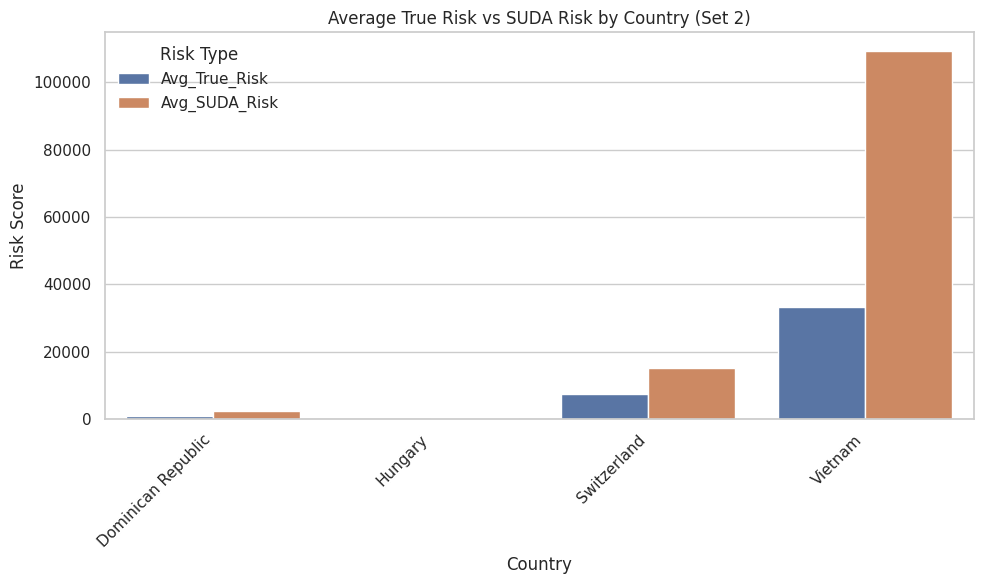

/tmp/ipython-input-896491561.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_error_country, x="Country", y="Error_%", palette="viridis")


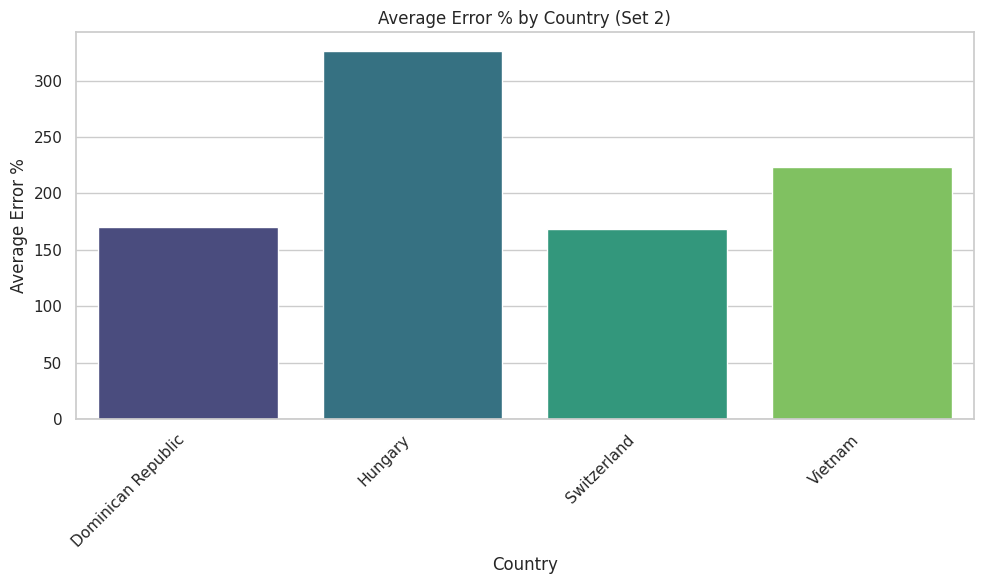

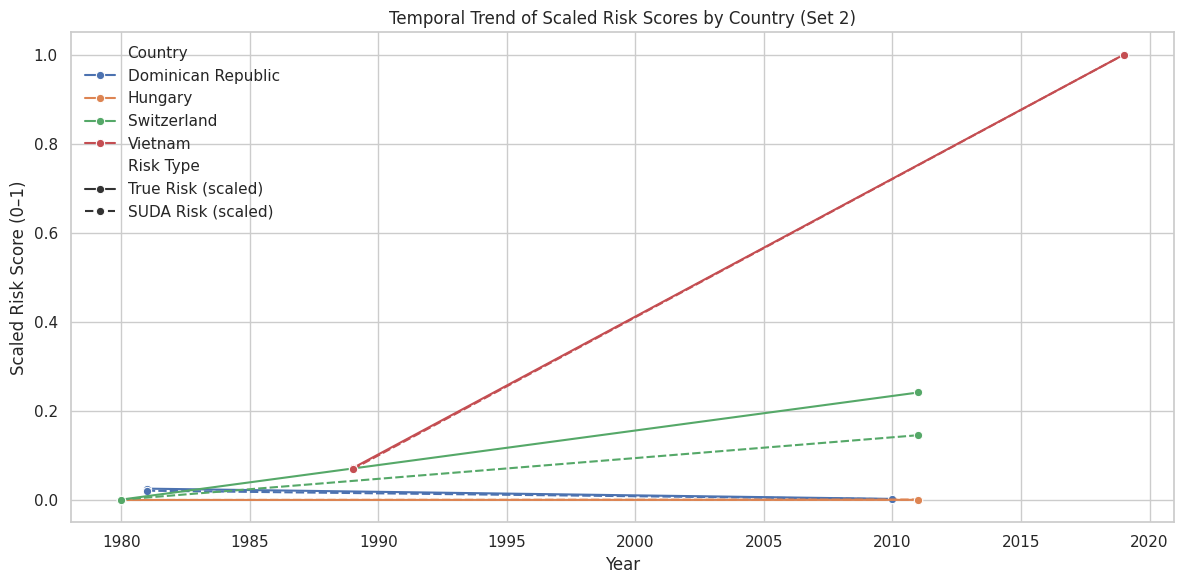

In [18]:
#Summarize Risk Comparison Data

#Display descriptive statistics
print("Descriptive statistics for risk_comparison.csv:")
display(df_risk[["True_Risk", "SUDA_Score", "Error_%"]].describe())

#16. Visualize Average True Risk vs SUDA Risk by Country
plt.figure(figsize=(10, 6))
avg_risk_country = df_risk.groupby("Country").agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean")
).reset_index()
avg_risk_country_melted = avg_risk_country.melt(id_vars="Country", var_name="Risk Type", value_name="Risk Score")
sns.barplot(data=avg_risk_country_melted, x="Country", y="Risk Score", hue="Risk Type")
plt.title("Average True Risk vs SUDA Risk by Country (Set 2)")
plt.ylabel("Risk Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#17. Visualize Average Error % by Country
plt.figure(figsize=(10, 6))
avg_error_country = df_risk.groupby("Country")["Error_%"].mean().reset_index()
sns.barplot(data=avg_error_country, x="Country", y="Error_%", palette="viridis")
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Average Error % by Country (Set 2)")
plt.ylabel("Average Error %")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#18. Visualize Temporal Trend of Average Risk Scores by Country
import seaborn as sns
import matplotlib.pyplot as plt

#Temporal averages
avg_risk_temporal = df_risk.groupby(["Country", "Year"]).agg(
    Avg_True_Risk=("True_Risk", "mean"),
    Avg_SUDA_Risk=("SUDA_Score", "mean")
).reset_index()

#Normalization (0–1 scaling across all values)
def minmax(series):
    return (series - series.min()) / (series.max() - series.min())

avg_risk_temporal["Avg_True_Risk_Scaled"] = minmax(avg_risk_temporal["Avg_True_Risk"])
avg_risk_temporal["Avg_SUDA_Risk_Scaled"] = minmax(avg_risk_temporal["Avg_SUDA_Risk"])

#Reshape for plotting
avg_risk_temporal_melted = avg_risk_temporal.melt(
    id_vars=["Country", "Year"],
    value_vars=["Avg_True_Risk_Scaled", "Avg_SUDA_Risk_Scaled"],
    var_name="Risk Type",
    value_name="Scaled Risk Score"
)

#Make labels prettier
avg_risk_temporal_melted["Risk Type"] = avg_risk_temporal_melted["Risk Type"].replace({
    "Avg_True_Risk_Scaled": "True Risk (scaled)",
    "Avg_SUDA_Risk_Scaled": "SUDA Risk (scaled)"
})

#Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_risk_temporal_melted,
    x="Year", y="Scaled Risk Score",
    hue="Country", style="Risk Type", marker="o"
)

plt.title("Temporal Trend of Scaled Risk Scores by Country (Set 2)")
plt.ylabel("Scaled Risk Score (0–1)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

Average Attribute Contribution Across All Country-Years (Set 2):


,Attribute,Contribution_%
3,persons,84.329656
2,ownershipd,56.423606
1,hhwt,50.071806
0,gq,19.675481
4,regionw,0.000000


/tmp/ipython-input-454131554.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_attr_contribution_sorted, x="Attribute", y="Contribution_%", palette="viridis")


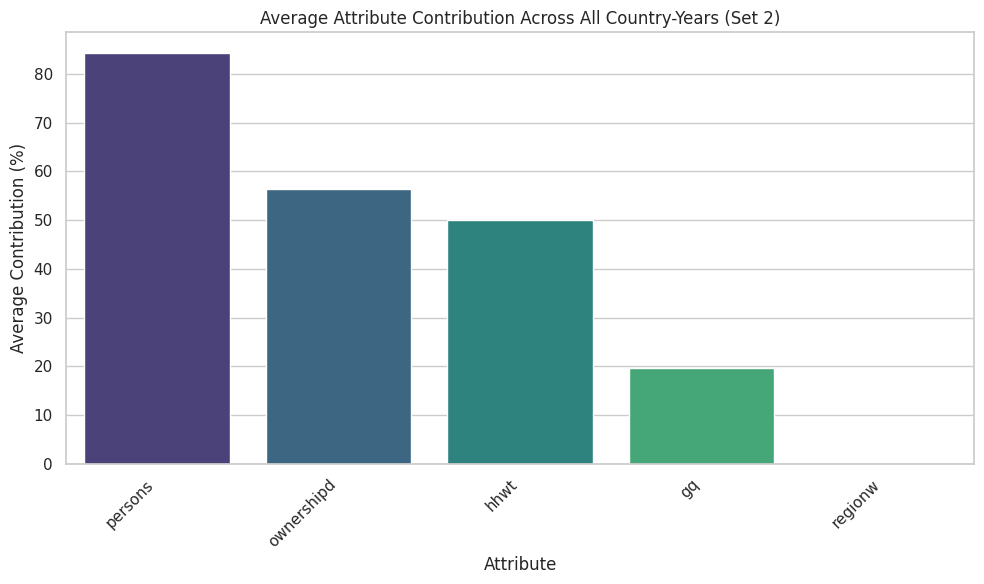


Attribute Contribution - Minimum and Maximum by Attribute:


,min,max
Attribute,,
gq,0.0000,65.6716
hhwt,0.0000,100.0000
ownershipd,26.9756,88.4058
persons,0.0000,100.0000
regionw,0.0000,0.0000


In [19]:
#Average contribution for each attribute across all country-years and samples
avg_attr_contribution = attr_df.groupby("Attribute")["Contribution_%"].mean().reset_index()

#Sort for easier identification of most/least contributing
avg_attr_contribution_sorted = avg_attr_contribution.sort_values(by="Contribution_%", ascending=False)

print("Average Attribute Contribution Across All Country-Years (Set 2):")
display(avg_attr_contribution_sorted)

#19. Visualize the average attribute contributions
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_attr_contribution_sorted, x="Attribute", y="Contribution_%", palette="viridis")
plt.title("Average Attribute Contribution Across All Country-Years (Set 2)")
plt.ylabel("Average Contribution (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nAttribute Contribution - Minimum and Maximum by Attribute:")
display(attr_df.groupby("Attribute")["Contribution_%"].agg(['min', 'max']))